<a href="https://colab.research.google.com/github/Brianmuriuki/Capstone6366/blob/main/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

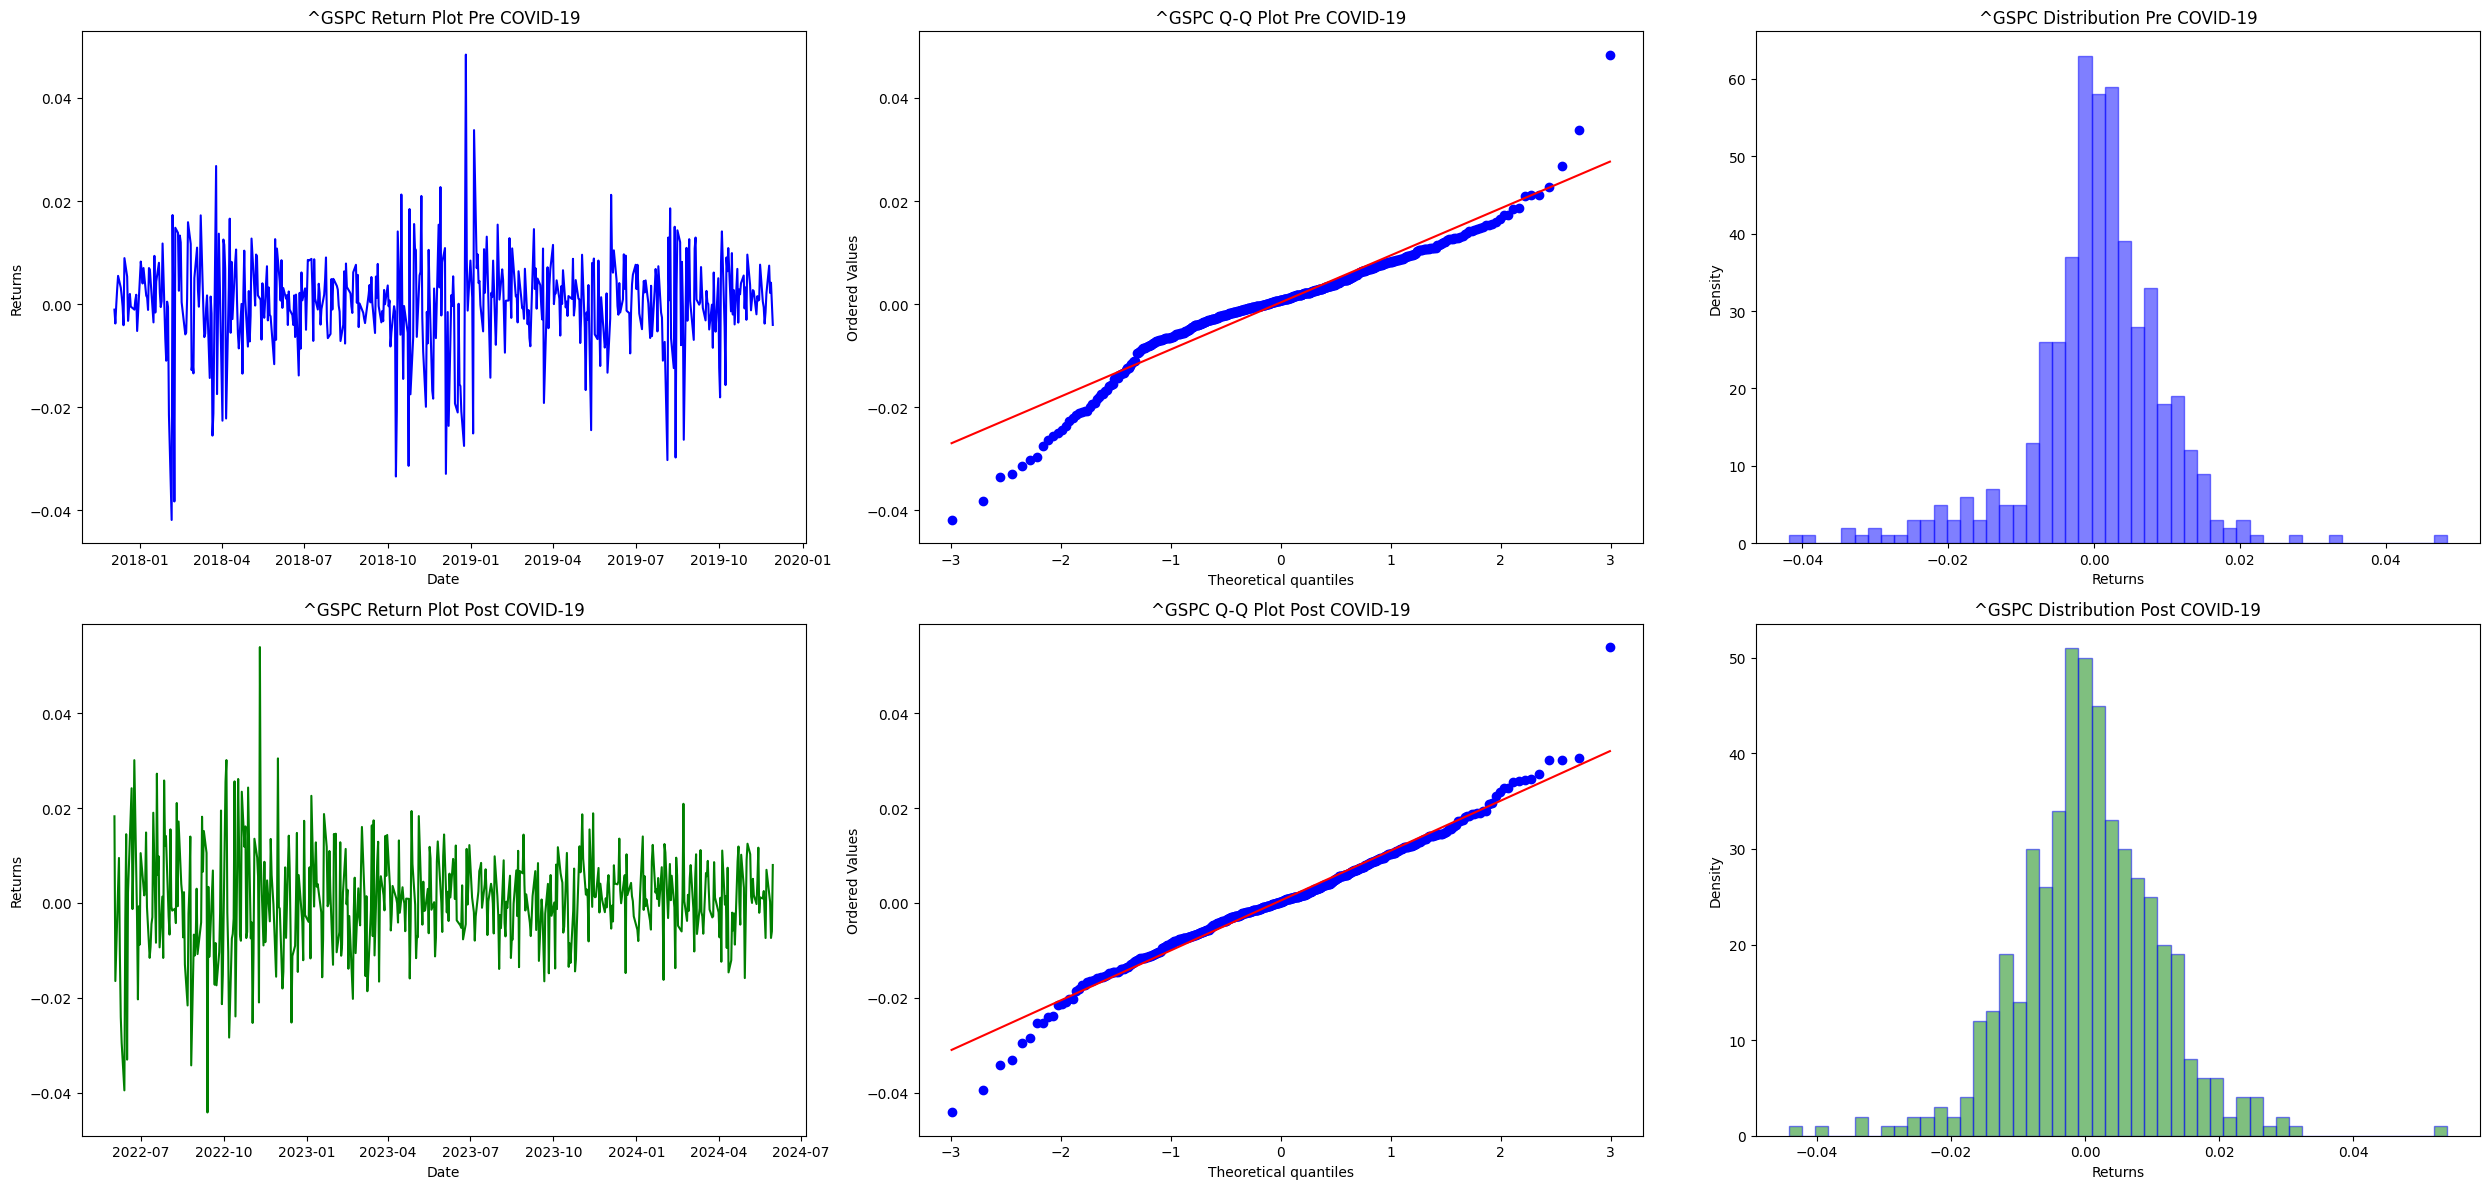

<Figure size 640x480 with 0 Axes>

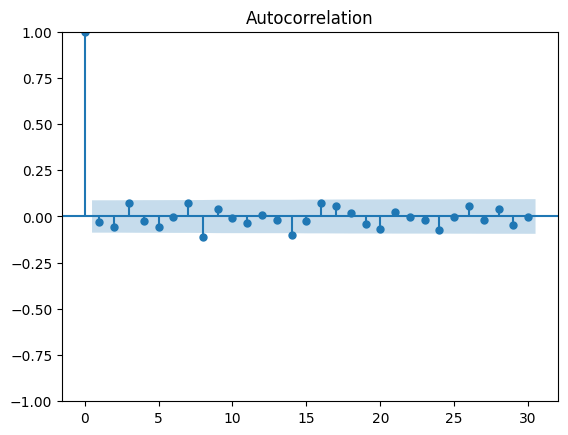

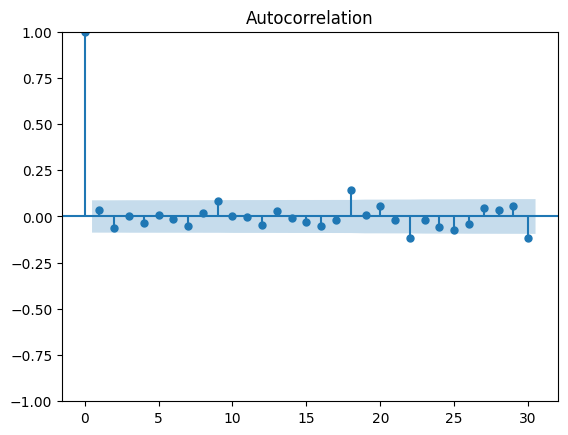

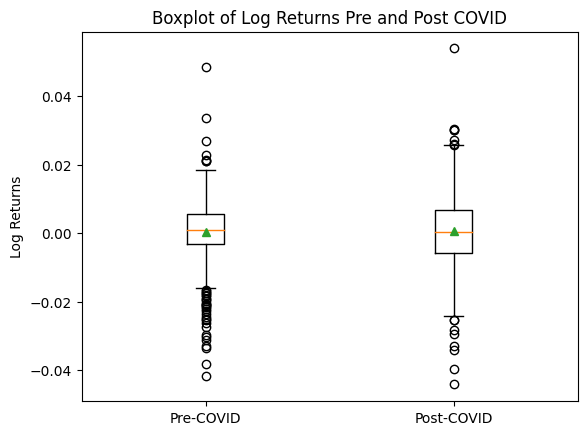

Statistics for ^GSPC:
Pre COVID-19:
  Mean: 0.000345
  Standard Deviation: 0.009424
  Skewness: -0.609232
  Kurtosis: 3.676159
ADF Statistic: -22.962046188814334
p-value: 0.0
Post COVID-19:
  Mean: 0.000502
  Standard Deviation: 0.010607
  Skewness: -0.003793
  Kurtosis: 2.219008
ADF Statistic: -21.647247128562107
p-value: 0.0



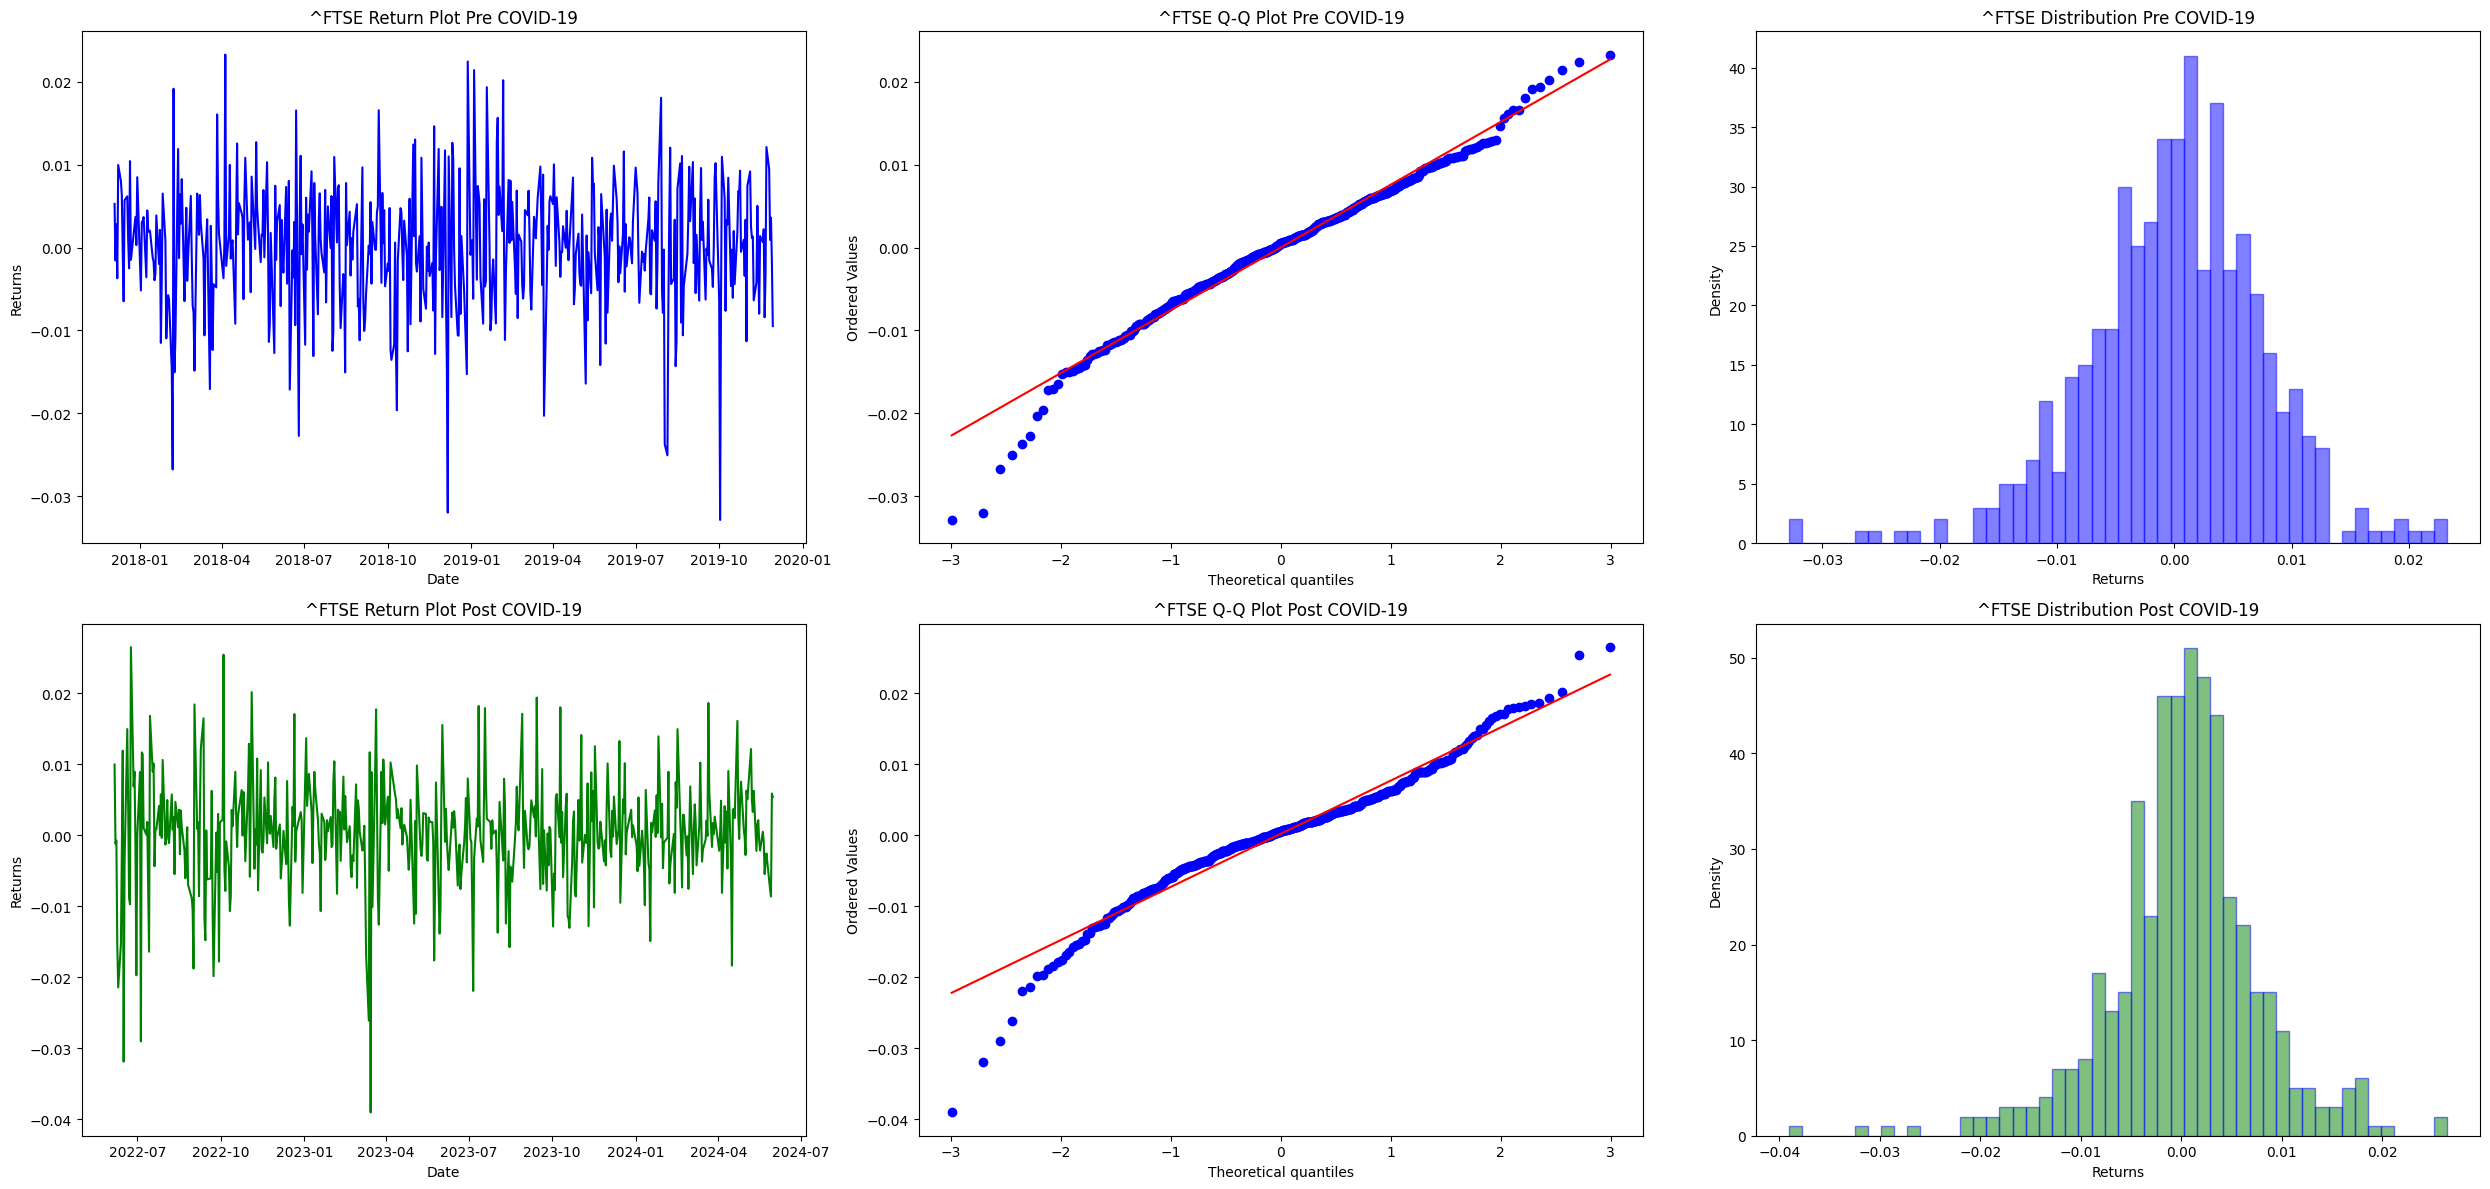

<Figure size 640x480 with 0 Axes>

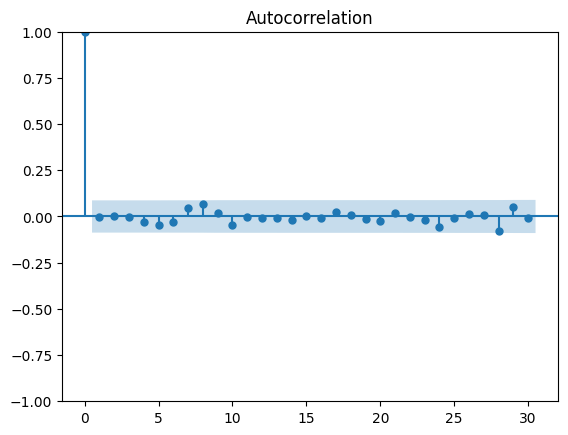

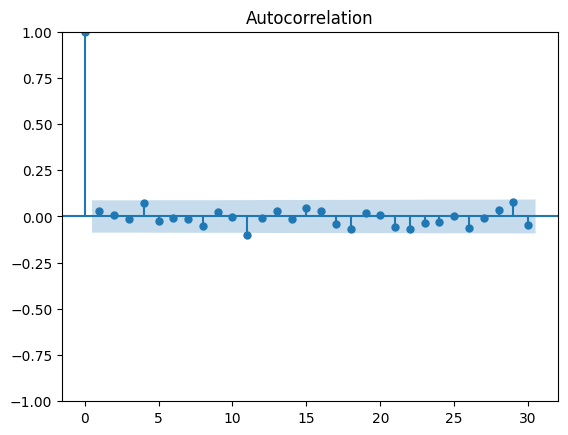

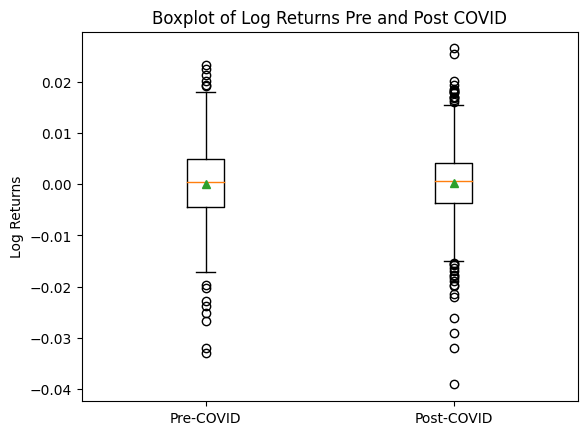

Statistics for ^FTSE:
Pre COVID-19:
  Mean: 0.000012
  Standard Deviation: 0.007607
  Skewness: -0.437525
  Kurtosis: 1.582906
ADF Statistic: -22.421544003785833
p-value: 0.0
Post COVID-19:
  Mean: 0.000187
  Standard Deviation: 0.007613
  Skewness: -0.511516
  Kurtosis: 2.864971
ADF Statistic: -21.715788221361816
p-value: 0.0



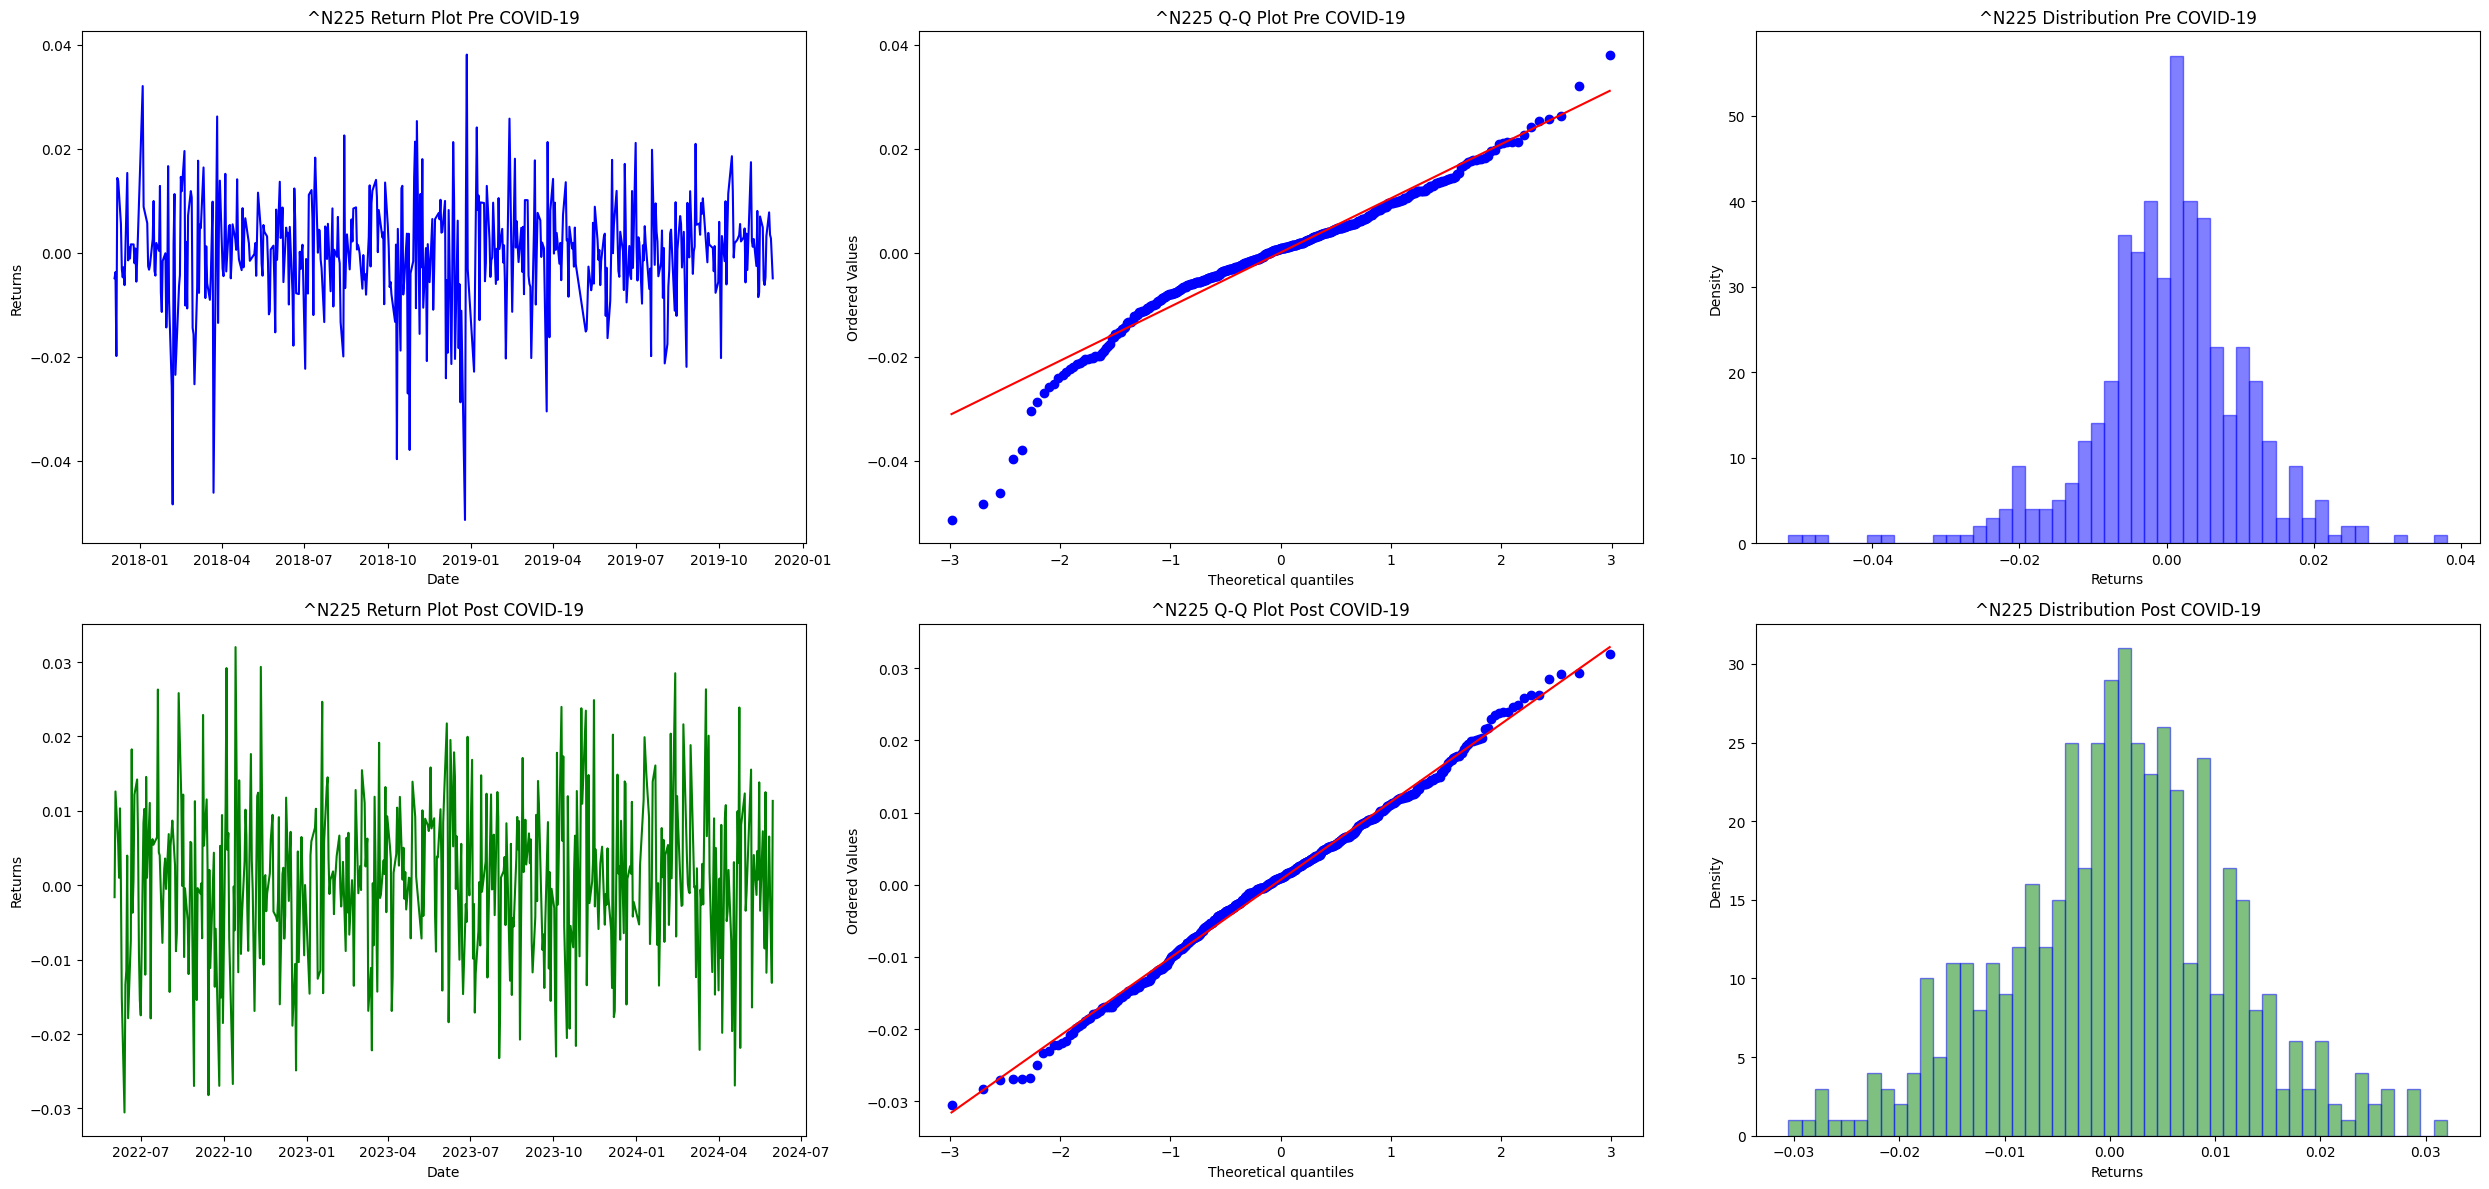

<Figure size 640x480 with 0 Axes>

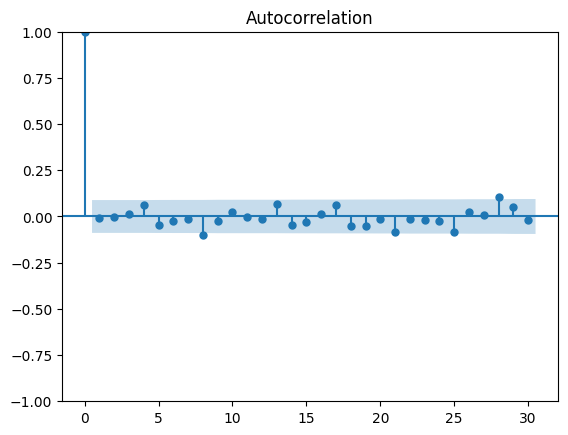

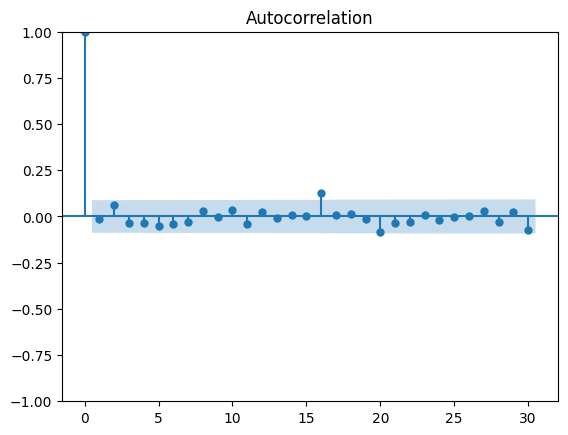

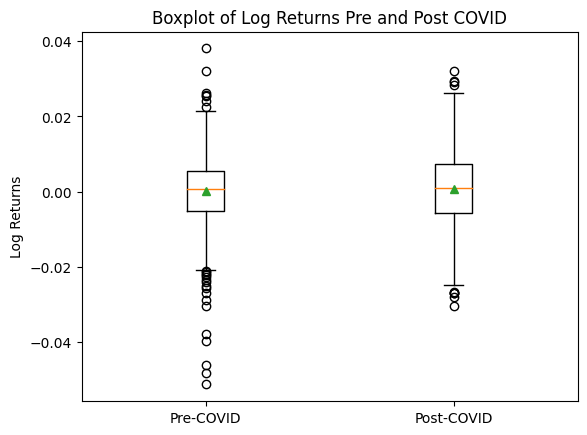

Statistics for ^N225:
Pre COVID-19:
  Mean: 0.000042
  Standard Deviation: 0.010634
  Skewness: -0.756676
  Kurtosis: 3.156046
ADF Statistic: -22.1696469701806
p-value: 0.0
Post COVID-19:
  Mean: 0.000688
  Standard Deviation: 0.010752
  Skewness: -0.073382
  Kurtosis: 0.129975
ADF Statistic: -22.433868032556685
p-value: 0.0



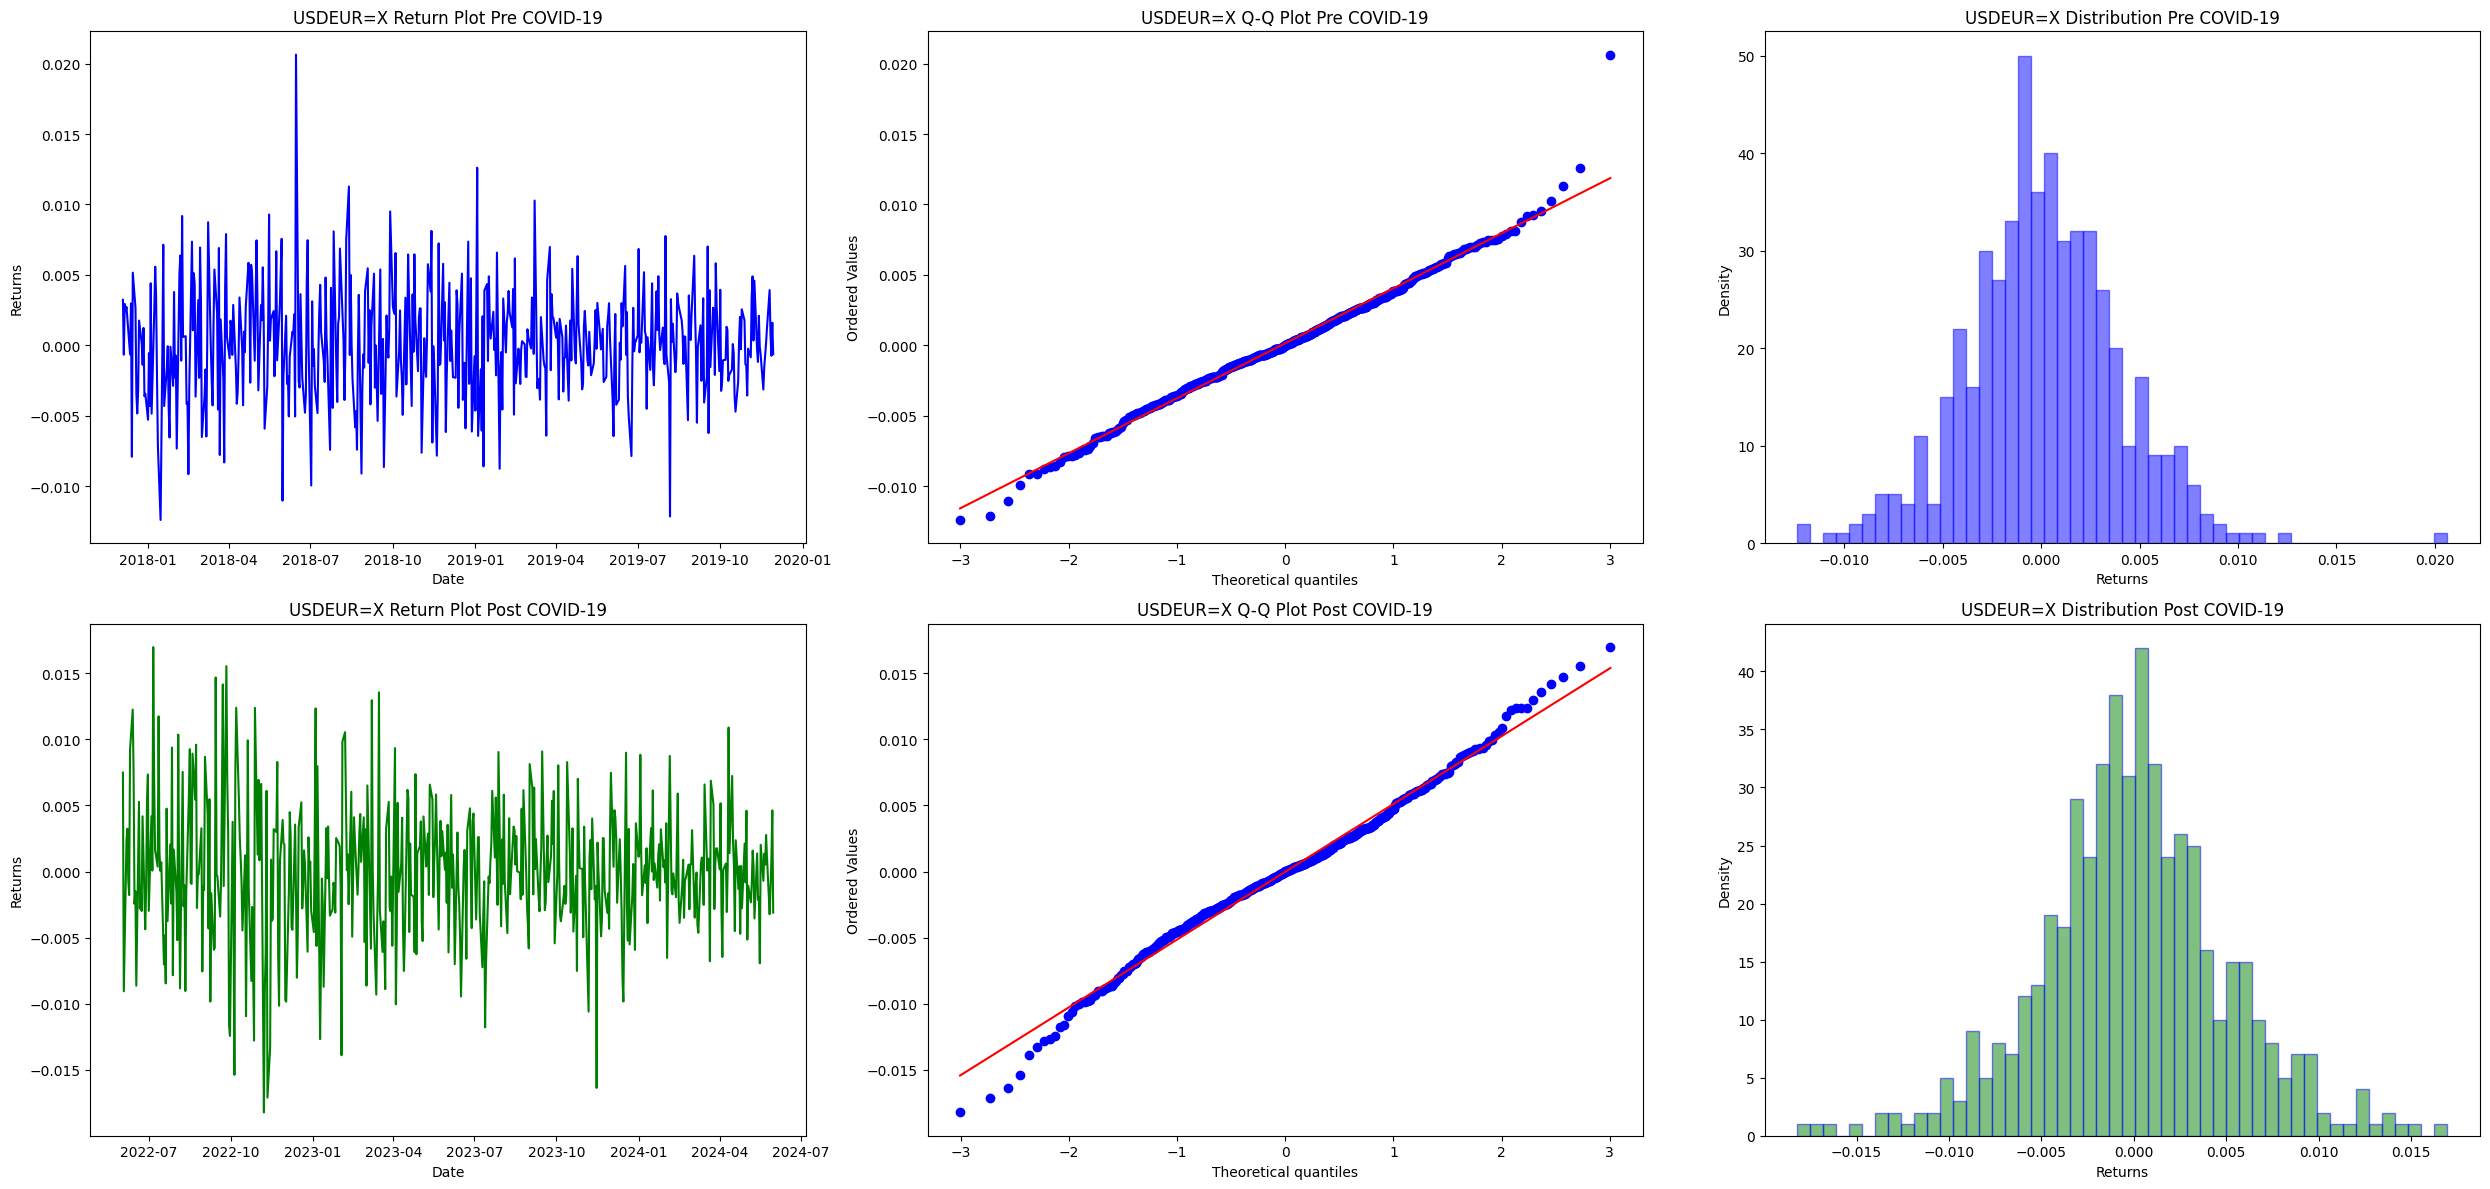

<Figure size 640x480 with 0 Axes>

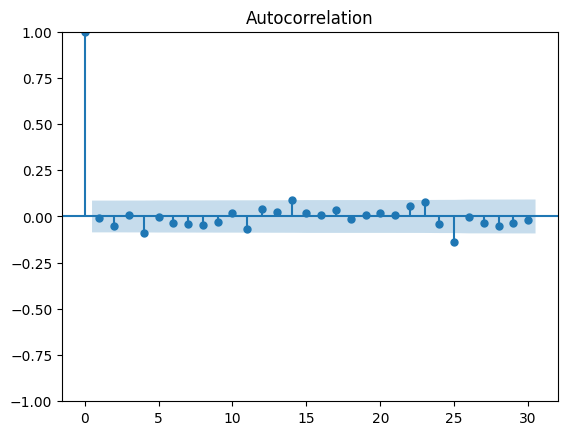

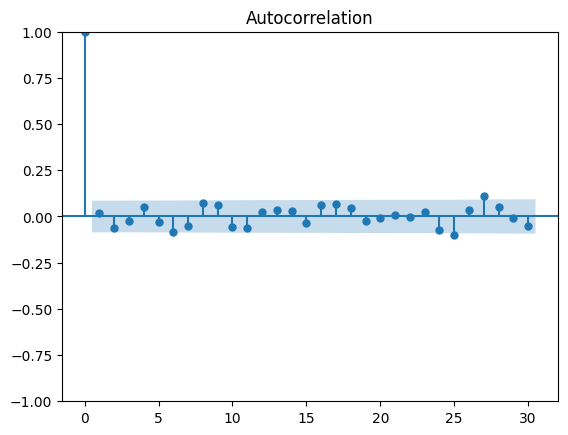

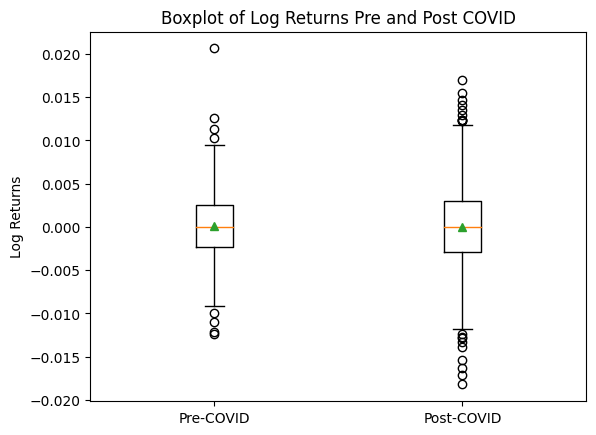

Statistics for USDEUR=X:
Pre COVID-19:
  Mean: 0.000149
  Standard Deviation: 0.003912
  Skewness: 0.216556
  Kurtosis: 1.463665
ADF Statistic: -12.705622513803467
p-value: 1.0566837789058864e-23
Post COVID-19:
  Mean: -0.000018
  Standard Deviation: 0.005128
  Skewness: -0.051509
  Kurtosis: 0.891700
ADF Statistic: -16.968152935992368
p-value: 9.201296663163442e-30



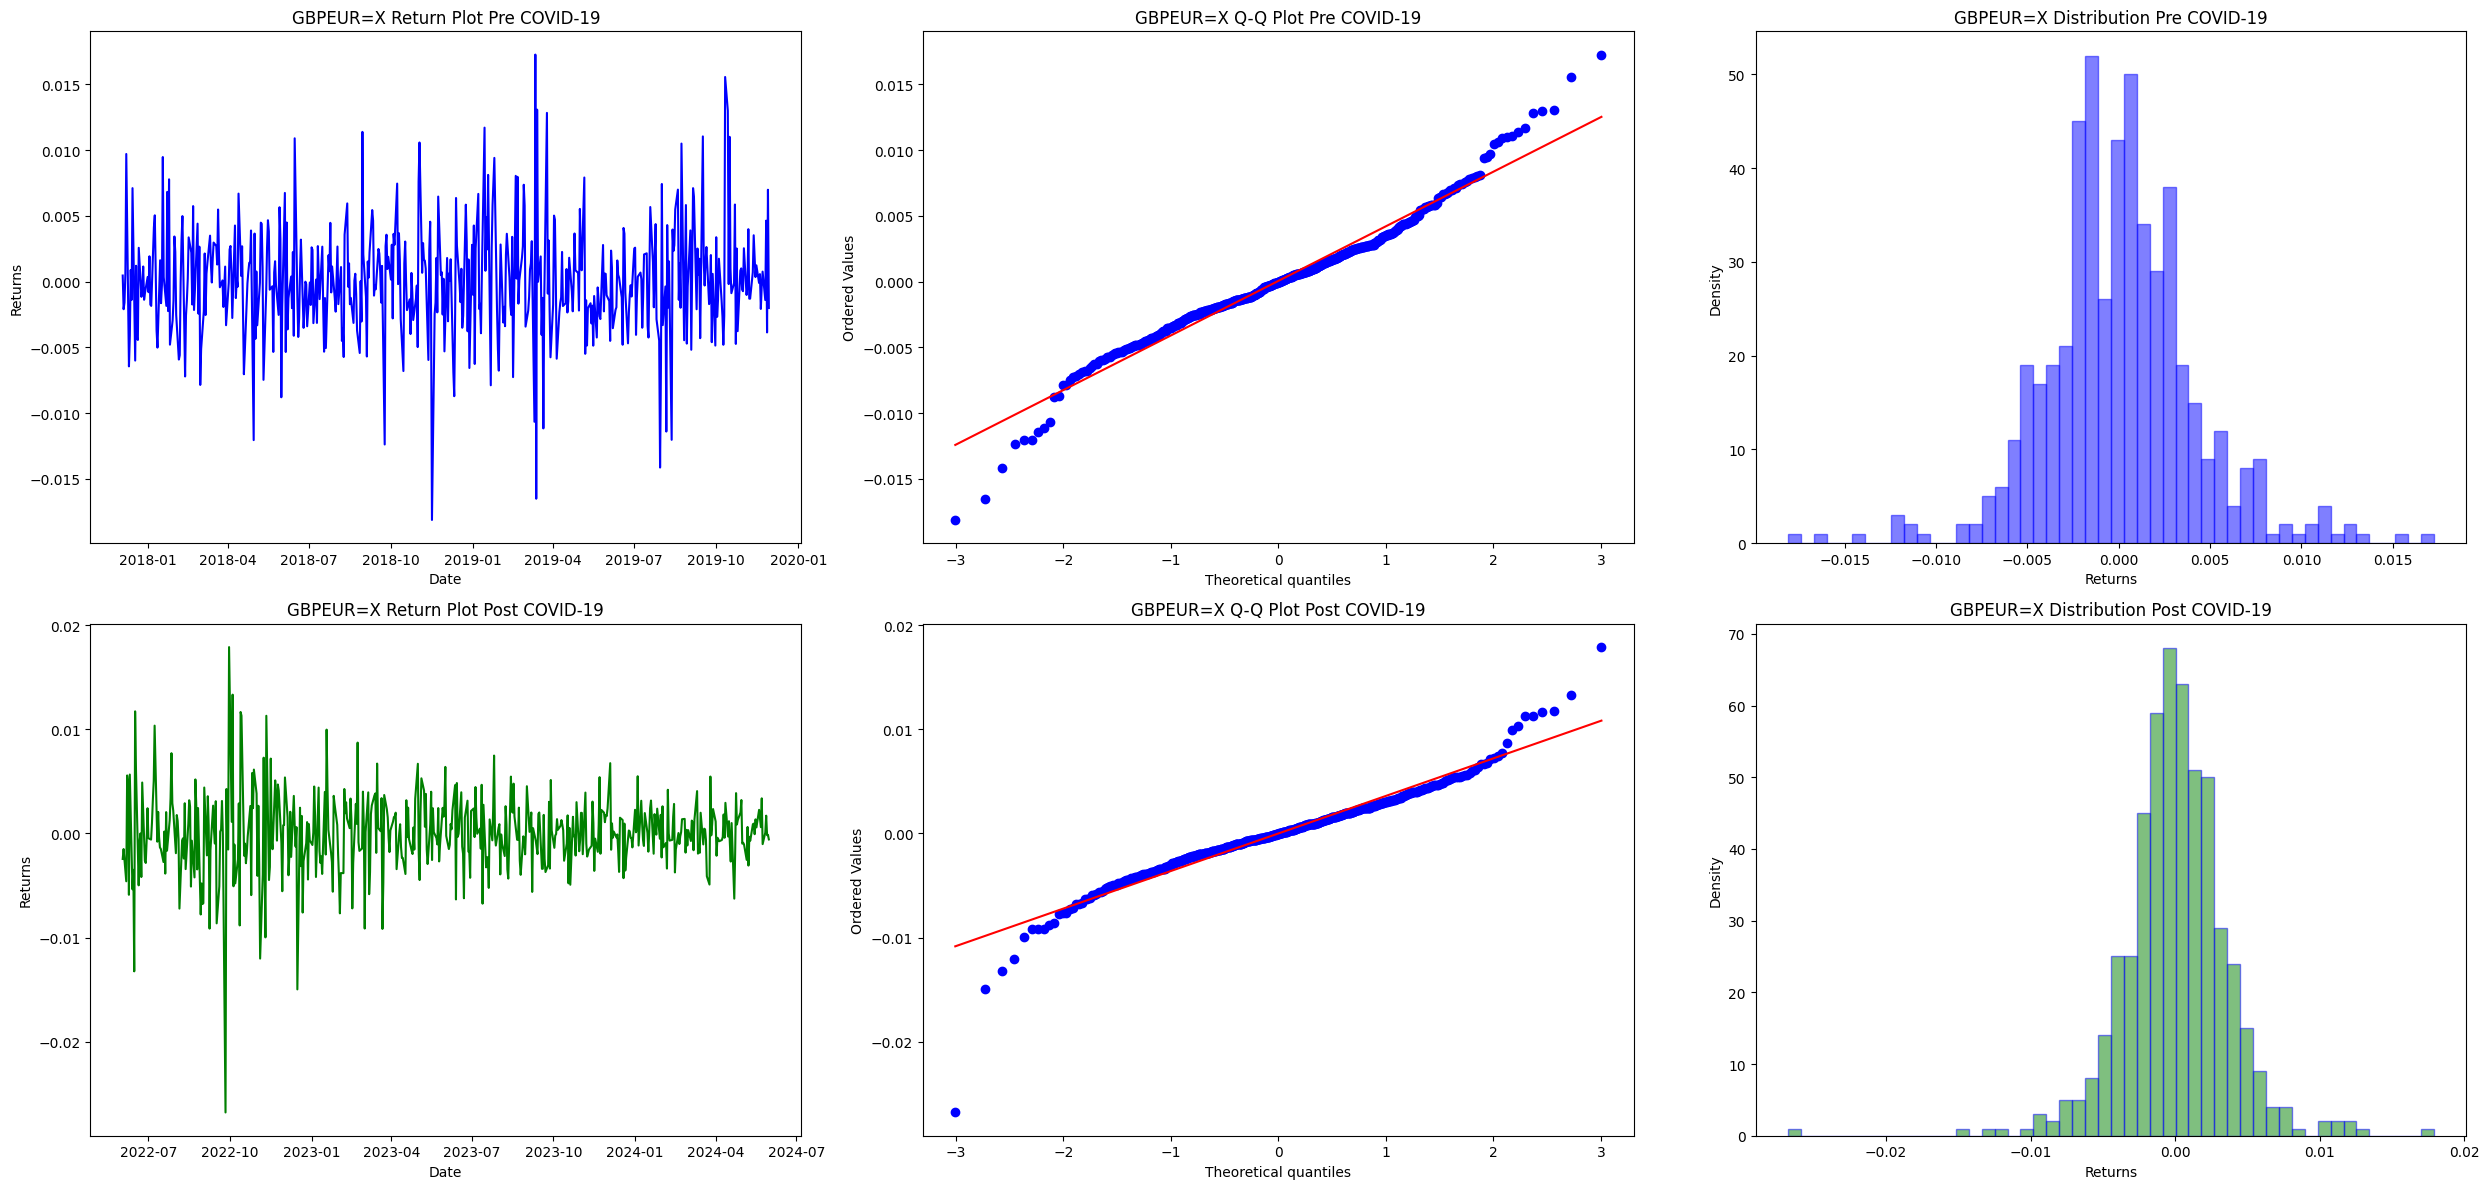

<Figure size 640x480 with 0 Axes>

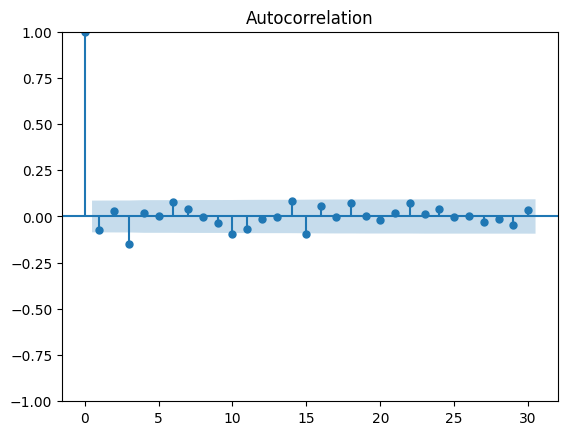

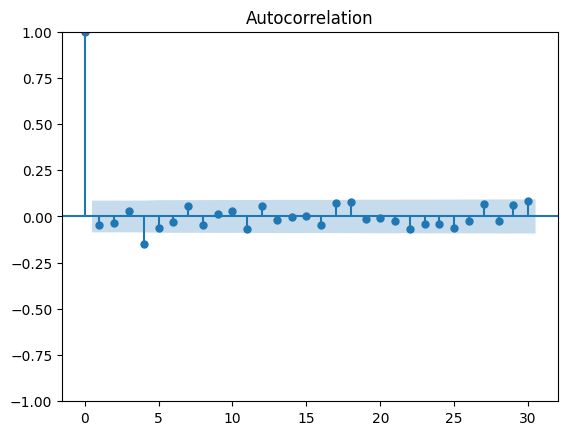

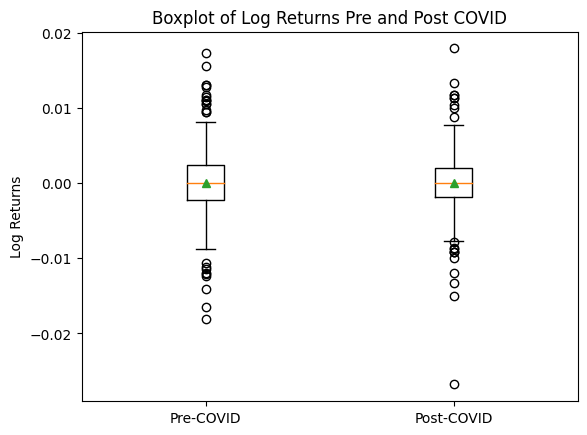

Statistics for GBPEUR=X:
Pre COVID-19:
  Mean: 0.000059
  Standard Deviation: 0.004202
  Skewness: 0.103904
  Kurtosis: 2.297314
ADF Statistic: -15.277299563214308
p-value: 4.629012269787139e-28
Post COVID-19:
  Mean: 0.000000
  Standard Deviation: 0.003724
  Skewness: -0.538208
  Kurtosis: 6.891527
ADF Statistic: -12.337577414326994
p-value: 6.222821310001503e-23



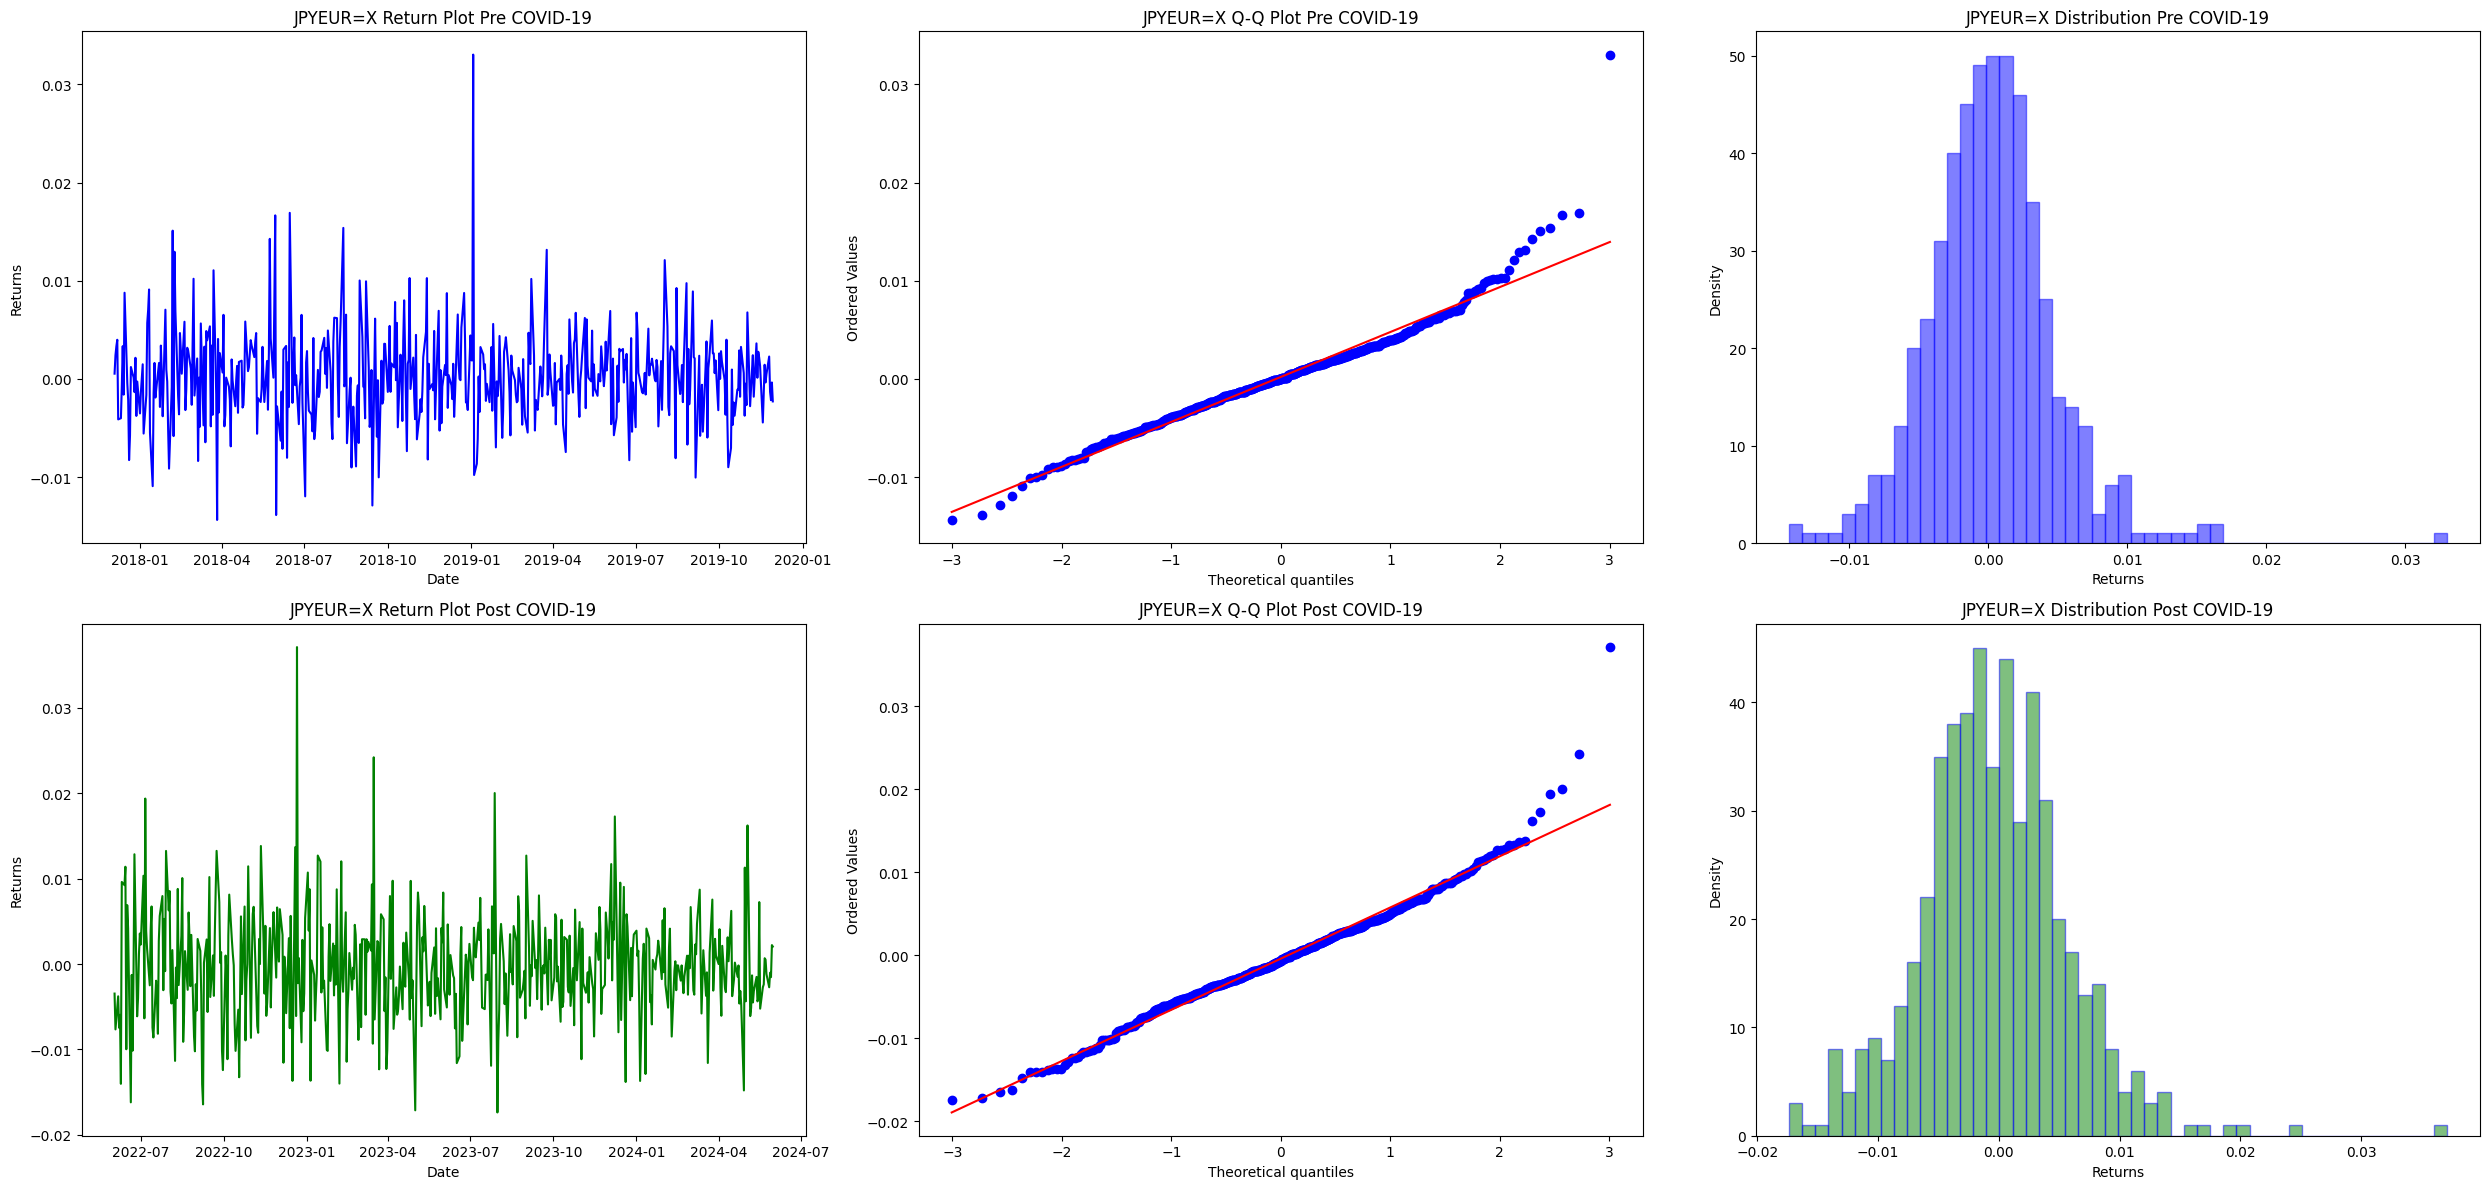

<Figure size 640x480 with 0 Axes>

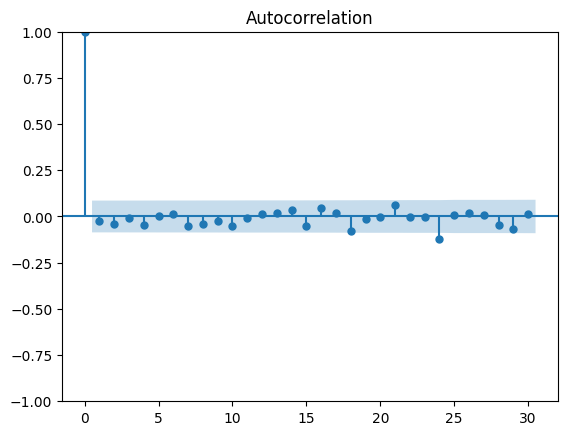

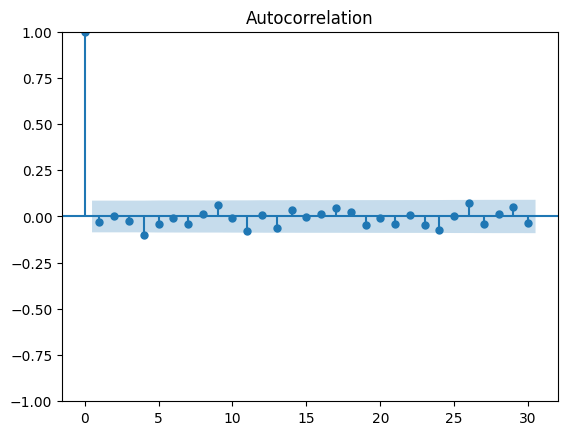

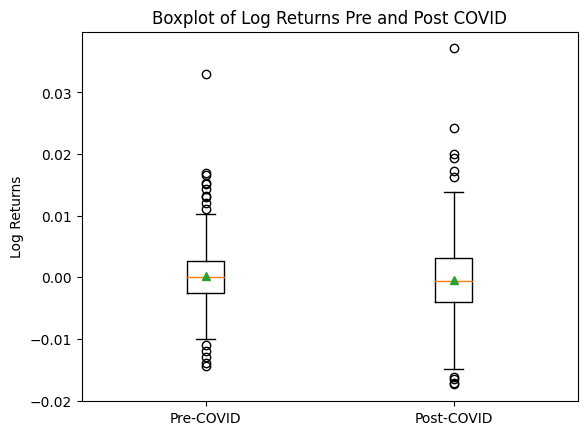

Statistics for JPYEUR=X:
Pre COVID-19:
  Mean: 0.000202
  Standard Deviation: 0.004676
  Skewness: 0.893470
  Kurtosis: 5.206572
ADF Statistic: -23.31149313212971
p-value: 0.0
Post COVID-19:
  Mean: -0.000397
  Standard Deviation: 0.006225
  Skewness: 0.556840
  Kurtosis: 2.819181
ADF Statistic: -23.533013678778033
p-value: 0.0



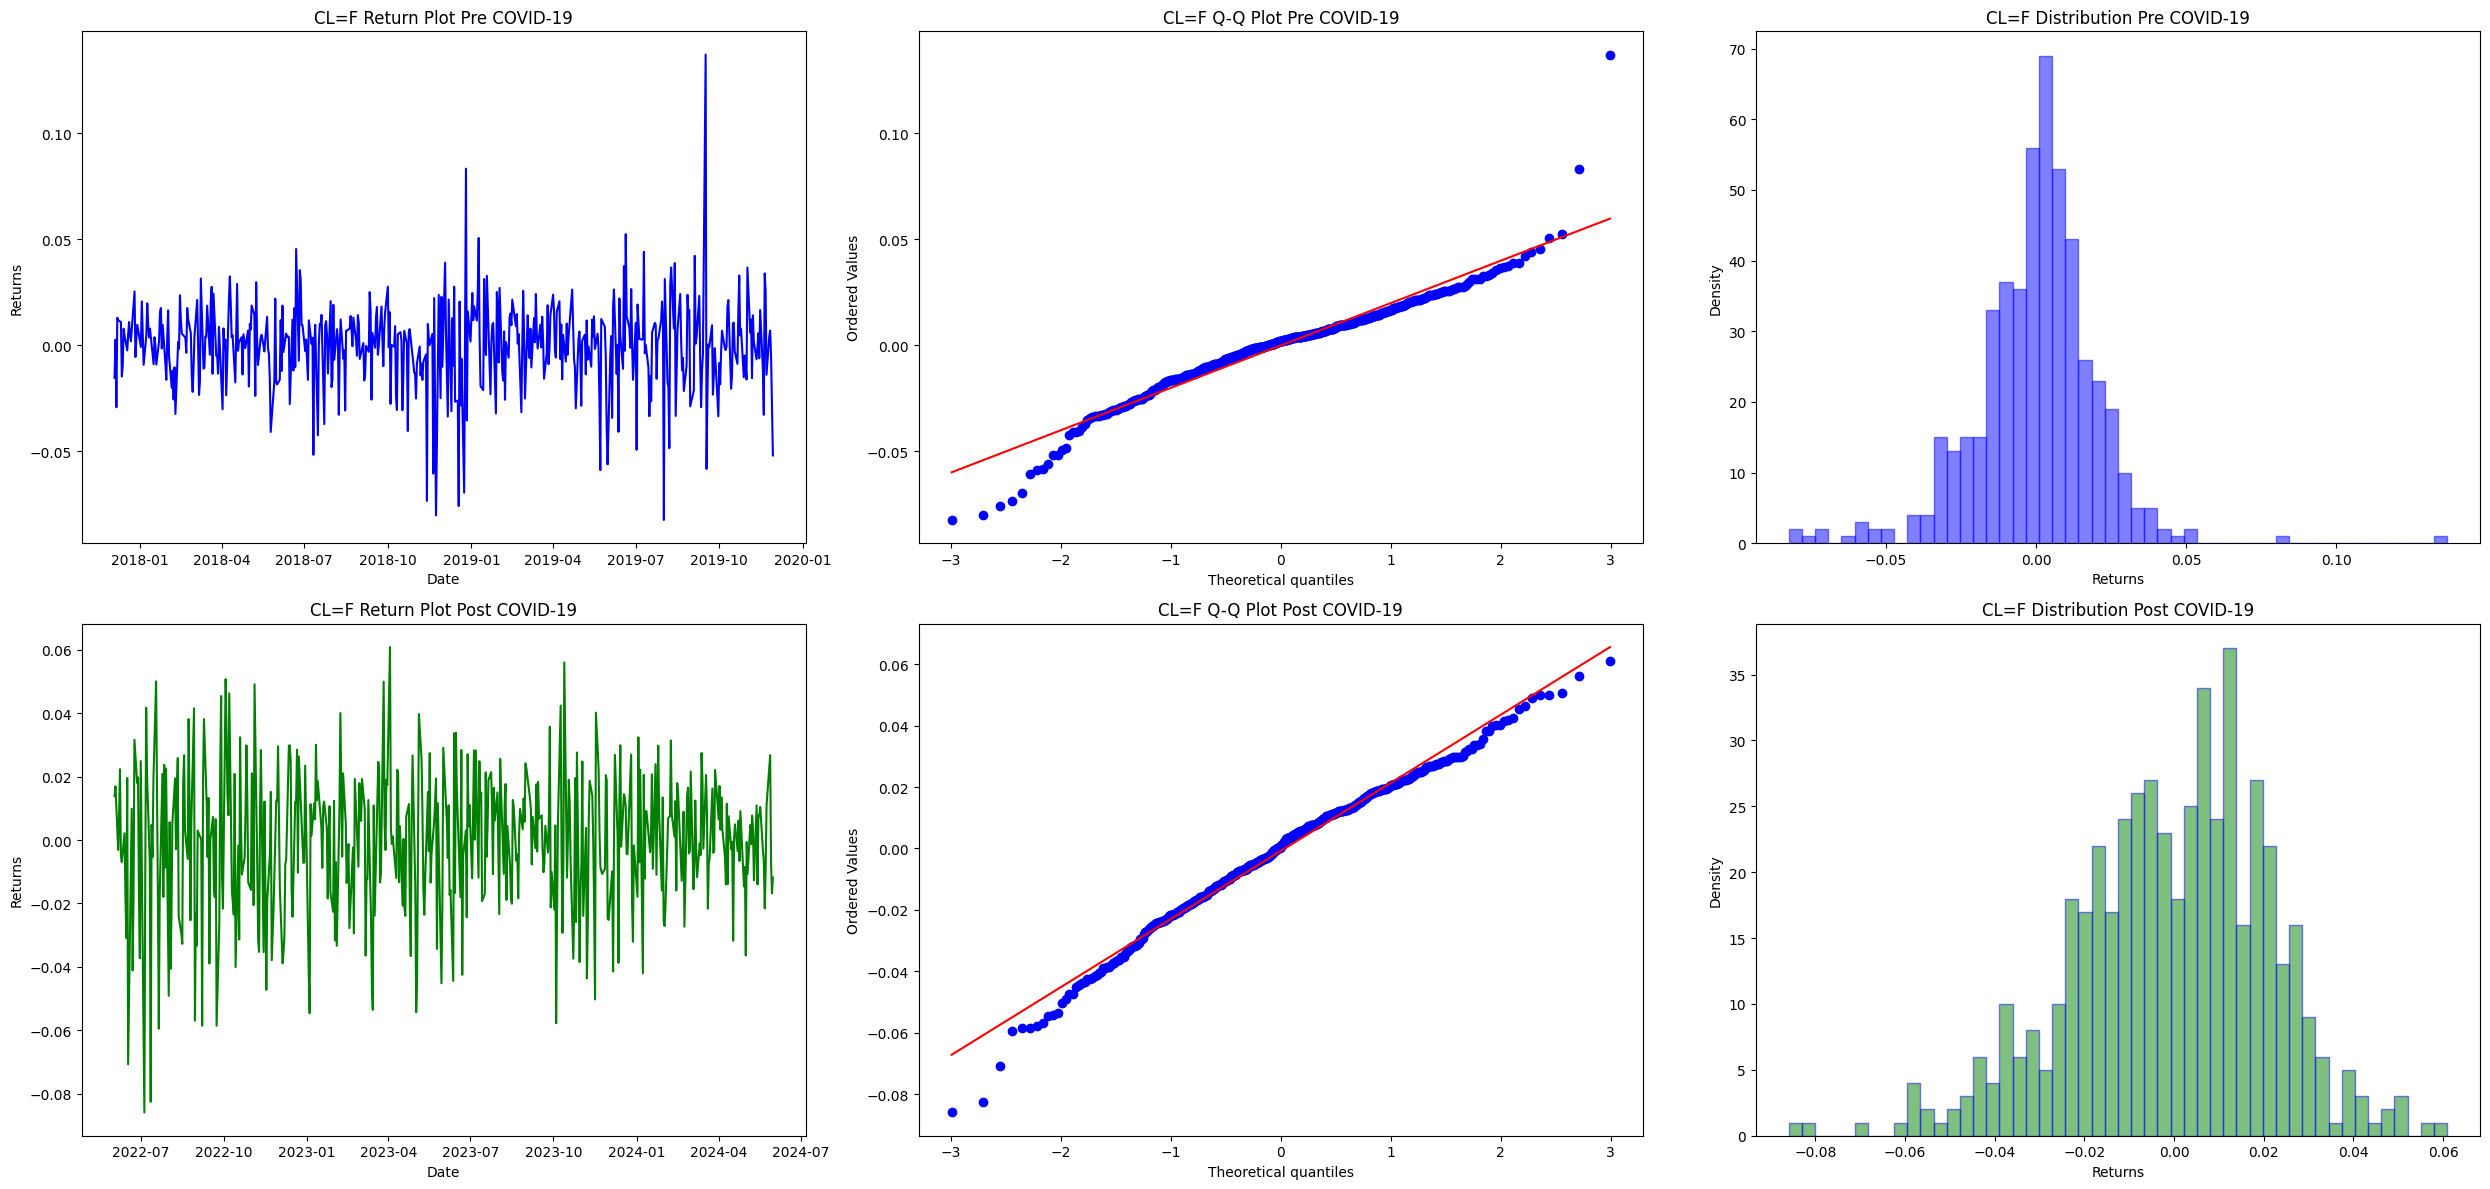

<Figure size 640x480 with 0 Axes>

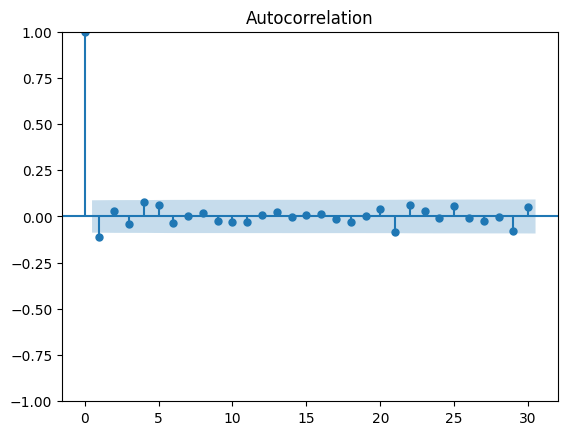

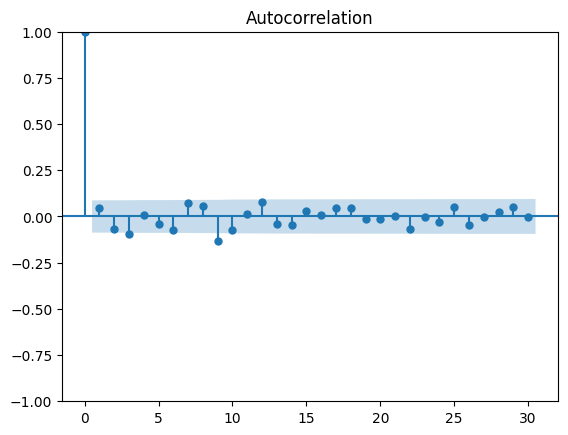

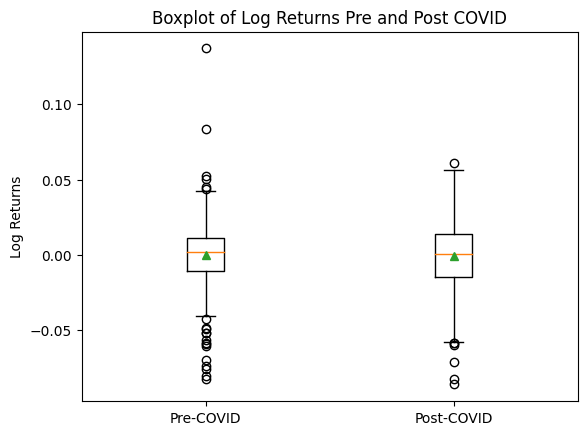

Statistics for CL=F:
Pre COVID-19:
  Mean: -0.000112
  Standard Deviation: 0.020583
  Skewness: -0.010612
  Kurtosis: 5.433982
ADF Statistic: -24.830574622751435
p-value: 0.0
Post COVID-19:
  Mean: -0.000802
  Standard Deviation: 0.022198
  Skewness: -0.440262
  Kurtosis: 0.543947
ADF Statistic: -8.648047642229619
p-value: 5.2056474451055316e-14



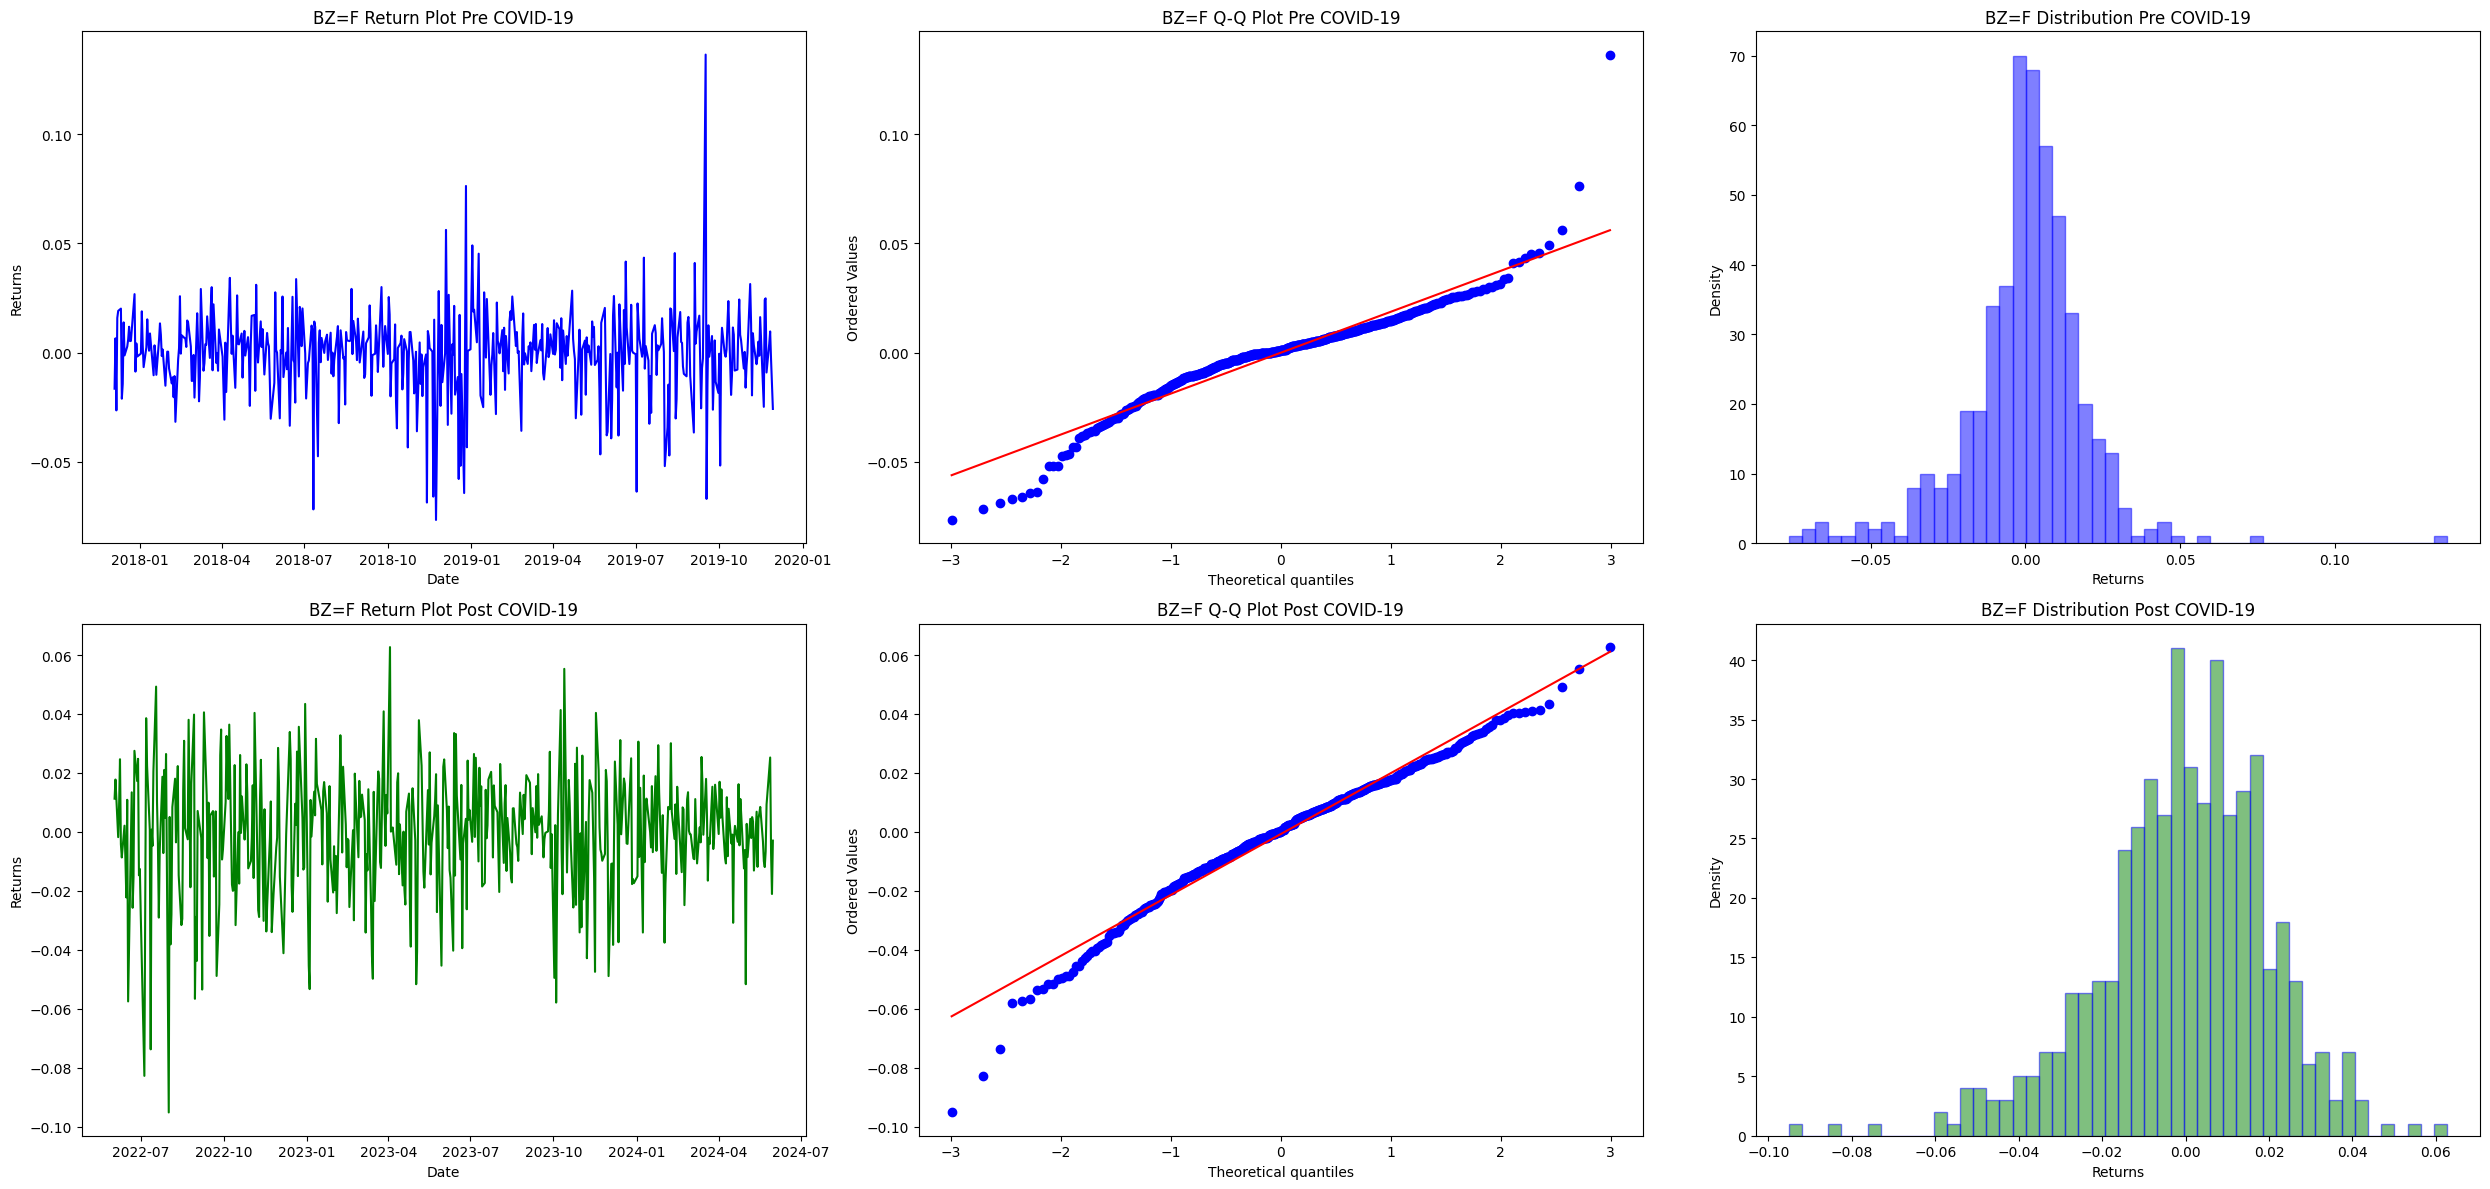

<Figure size 640x480 with 0 Axes>

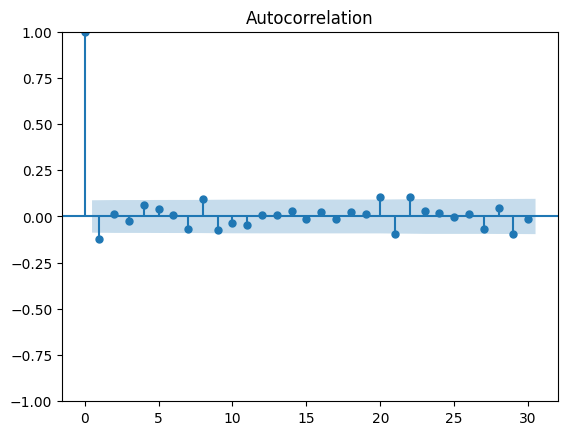

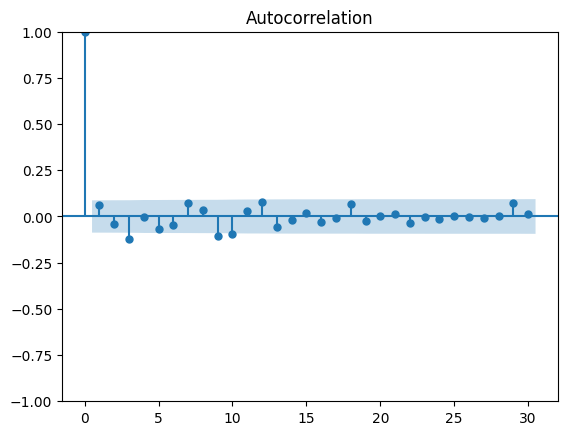

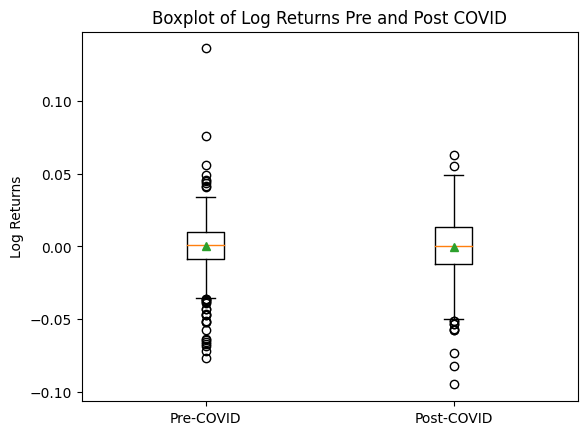

Statistics for BZ=F:
Pre COVID-19:
  Mean: -0.000034
  Standard Deviation: 0.019519
  Skewness: 0.017200
  Kurtosis: 6.426476
ADF Statistic: -25.233920177499527
p-value: 0.0
Post COVID-19:
  Mean: -0.000704
  Standard Deviation: 0.020779
  Skewness: -0.604254
  Kurtosis: 1.330463
ADF Statistic: -8.719084531736966
p-value: 3.424264668789817e-14



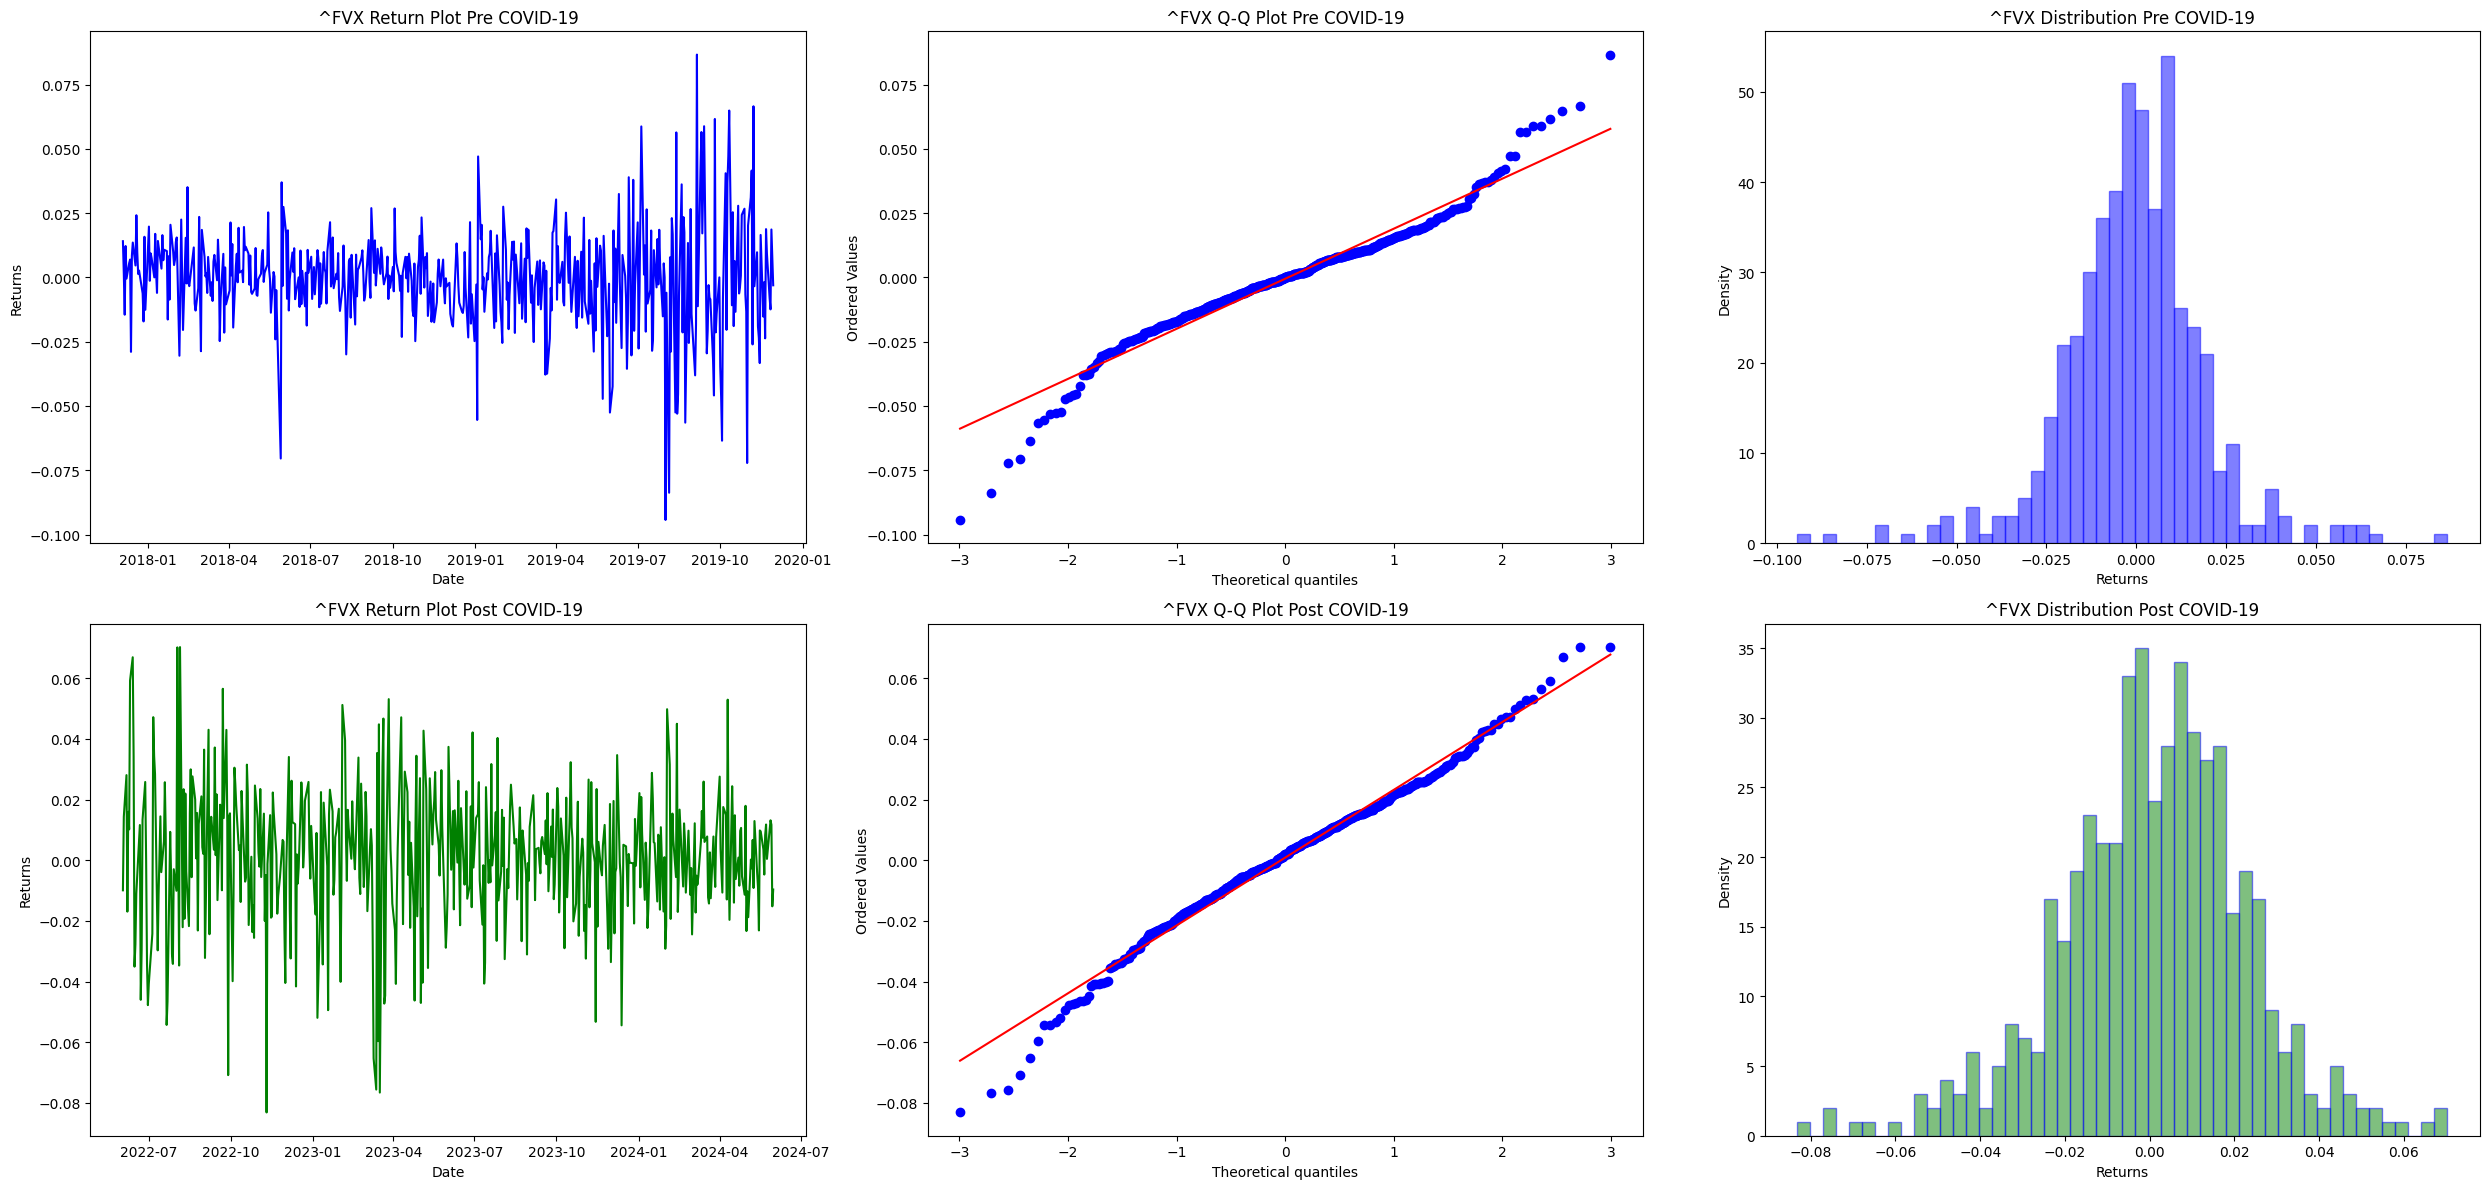

<Figure size 640x480 with 0 Axes>

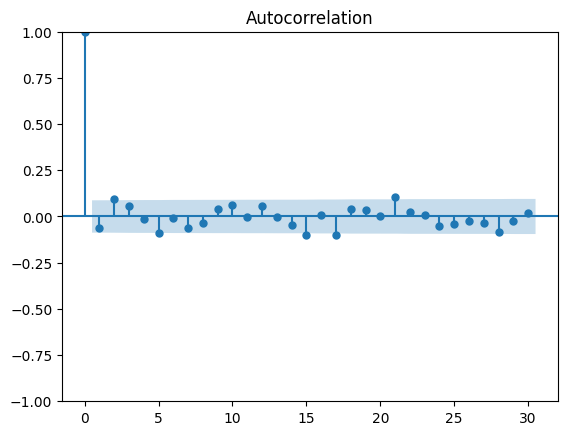

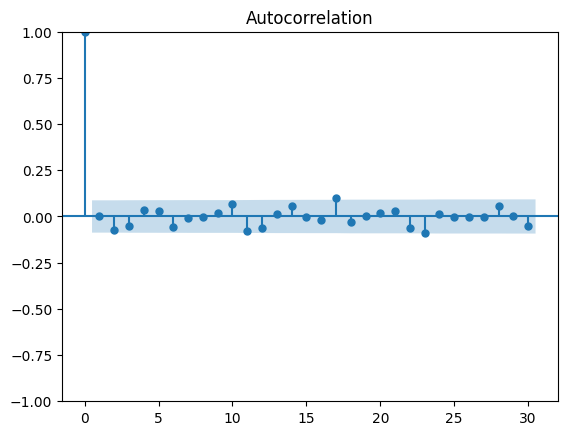

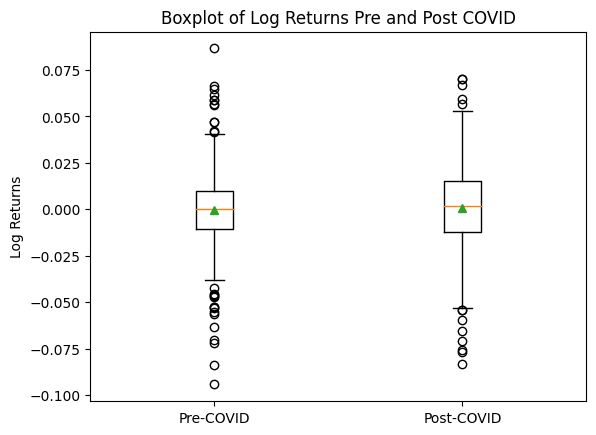

Statistics for ^FVX:
Pre COVID-19:
  Mean: -0.000534
  Standard Deviation: 0.019884
  Skewness: -0.204051
  Kurtosis: 3.261435
ADF Statistic: -10.431551239804241
p-value: 1.6058395445184559e-18
Post COVID-19:
  Mean: 0.000862
  Standard Deviation: 0.022416
  Skewness: -0.293485
  Kurtosis: 1.037449
ADF Statistic: -16.908538937616417
p-value: 1.014853628965393e-29



<Figure size 640x480 with 0 Axes>

In [ ]:
# Libaries

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

# Yfinance tickers of assets tags Equities, FX, Bonds and Commodities
tickers = ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]

# Dataframe for pre and post covid-periods
log_returns_pre_covid_list = []
log_returns_post_covid_list = []

for ticker in tickers:

    asset = yf.Ticker(ticker)

    # Data before COVID-19 2 years before COVID-19
    data_pre_covid = asset.history(start="2017-12-01", end="2019-12-01")
    data_pre_covid = data_pre_covid['Close']

    # Data after COVID-19 2 years after COVID-19
    data_post_covid = asset.history(start="2022-06-01", end="2024-06-01")
    data_post_covid = data_post_covid['Close']

    # Calculating log returns pre and post covid
    log_returns_pre_covid = np.log(1 + data_pre_covid.pct_change())
    log_returns_post_covid = np.log(1 + data_post_covid.pct_change())

    # Data cleaning  to remove na and non numeric values
    log_returns_pre_covid = log_returns_pre_covid.dropna()
    log_returns_post_covid = log_returns_post_covid.dropna()

    log_returns_pre_covid_list.append(log_returns_pre_covid)
    log_returns_post_covid_list.append(log_returns_post_covid)

    plt.figure(figsize=(25, 12))

    # Plotting returns and subplots
    plt.subplot(2, 3, 1)
    plt.plot(log_returns_pre_covid, color='b')
    plt.title(ticker + " Return Plot Pre COVID-19")
    plt.xlabel("Date")
    plt.ylabel("Returns")

    plt.subplot(2, 3, 2)
    # Prob plot to vsually check for normality
    stats.probplot(log_returns_pre_covid, dist="norm", plot=plt)
    plt.title(ticker + " Q-Q Plot Pre COVID-19")

    plt.subplot(2, 3, 3)
    plt.hist(log_returns_pre_covid, bins=50, color='b', alpha=.5, edgecolor='b')
    plt.title(ticker + " Distribution Pre COVID-19")
    plt.xlabel("Returns")
    plt.ylabel("Density")

    plt.subplot(2, 3, 4)
    plt.plot(log_returns_post_covid, color='g')
    plt.title(ticker + " Return Plot Post COVID-19")
    plt.xlabel("Date")
    plt.ylabel("Returns")

    plt.subplot(2, 3, 5)
    stats.probplot(log_returns_post_covid, dist="norm", plot=plt)
    plt.title(ticker + " Q-Q Plot Post COVID-19")

    plt.subplot(2, 3, 6)
    plt.hist(log_returns_post_covid, bins=50, color='g', alpha=.5, edgecolor='b')
    plt.title(ticker + " Distribution Post COVID-19")
    plt.xlabel("Returns")
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()



    # Generate autocorrelation plot of returns (pre and post covid )

    sm.graphics.tsa.plot_acf(log_returns_pre_covid, lags=30)

    plt.show()

    sm.graphics.tsa.plot_acf(log_returns_post_covid, lags=30)

    plt.show()

    # Box plot of pre and post covid returns

    data_plt = [log_returns_pre_covid, log_returns_post_covid]
    plt.boxplot(data_plt, showmeans=True)
    plt.xticks([1, 2], ['Pre-COVID', 'Post-COVID'])
    plt.title('Boxplot of Log Returns Pre and Post COVID')
    plt.ylabel('Log Returns')

    plt.show()

    # Calculate statistics (mean, stadard, skwe, kurt and stationarity )
    mean_pre = np.mean(log_returns_pre_covid)
    std_dev_pre = np.std(log_returns_pre_covid)
    skewness_pre = np.mean((log_returns_pre_covid - mean_pre) ** 3) / (std_dev_pre ** 3)
    kurtosis_pre = np.mean((log_returns_pre_covid - mean_pre) ** 4) / (std_dev_pre ** 4) - 3
    stationarity_pre=adfuller(log_returns_pre_covid)


    mean_post = np.mean(log_returns_post_covid)
    std_dev_post = np.std(log_returns_post_covid)
    skewness_post = np.mean((log_returns_post_covid - mean_post) ** 3) / (std_dev_post ** 3)
    kurtosis_post = np.mean((log_returns_post_covid - mean_post) ** 4) / (std_dev_post ** 4) - 3
    stationarity_post=adfuller(log_returns_post_covid)




    # Print results
    print(f"Statistics for {ticker}:")
    print("Pre COVID-19:")
    print(f"  Mean: {mean_pre:.6f}")
    print(f"  Standard Deviation: {std_dev_pre:.3f}")
    print(f"  Skewness: {skewness_pre:.3f}")
    print(f"  Kurtosis: {kurtosis_pre:.3f}")
    print(f"ADF Statistic: {stationarity_pre[0]}")
    print(f"p-value: {stationarity_pre[1]}")


    print("Post COVID-19:")
    print(f"  Mean: {mean_post:.3f}")
    print(f"  Standard Deviation: {std_dev_post:.3f}")
    print(f"  Skewness: {skewness_post:.3f}")
    print(f"  Kurtosis: {kurtosis_post:.3 f}")
    print(f"ADF Statistic: {stationarity_post[0]}")
    print(f"p-value: {stationarity_post[1]}")

    print()


plt.tight_layout()

In [ ]:
'''
import pandas as pd

# Reading data from Github link
covid_data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
#dubai_crude = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
#JP_Bond = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
#UK_Bond = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
#US_Bond = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'




# Read data into pandas DataFrame
df = pd.read_csv(url)

# Display first few rows of the DataFrame
print(df.tail())
'''

"\nimport pandas as pd\n\n# Reading data from Github link\ncovid_data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'\n#dubai_crude = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'\n#JP_Bond = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'\n#UK_Bond = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'\n#US_Bond = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'\n\n\n\n\n# Read data into pandas DataFrame\ndf = pd.read_csv(url)\n\n# Display first few rows of the DataFrame\

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


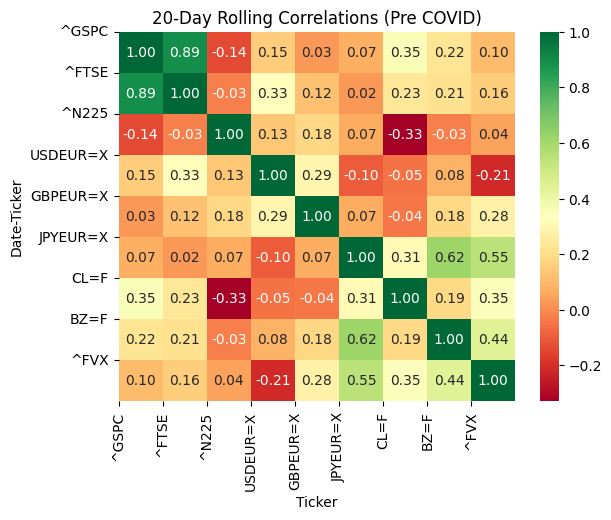

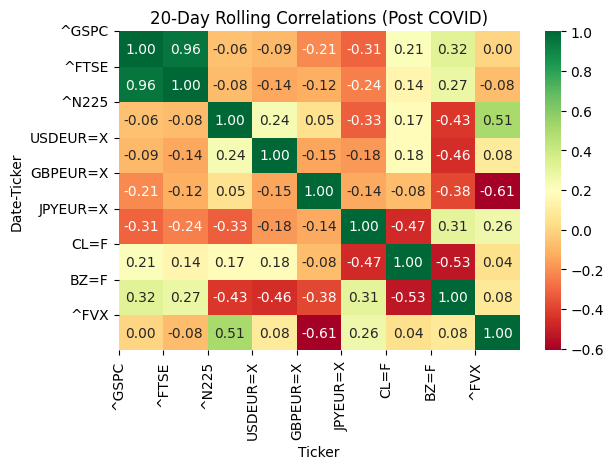

In [ ]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stocks = ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]

# Pre and Post COVID
data = yf.download(stocks, start='2017-12-01', end='2019-12-01')['Adj Close']
data_2 = yf.download(stocks, start='2022-06-01', end='2024-06-01')['Adj Close']



rets = (1+data.pct_change())
rets_2 = (1+data_2.pct_change())

#  20-day rolling correlation
corr_20_day = rets.rolling(window=20).corr()
corr_20_day_2 = rets_2.rolling(window=20).corr()


corr_matrix = corr_20_day.iloc[-len(stocks):]
corr_matrix_2 = corr_20_day_2.iloc[-len(stocks):]



sns.heatmap(corr_matrix, cmap='RdYlGn', annot=True, fmt=".2f")

plt.title('20-Day Rolling Correlations (Pre COVID)')

plt.xticks(ticks=range(len(stocks)), labels=stocks, rotation='vertical')
plt.yticks(ticks=range(len(stocks)), labels=stocks, rotation='horizontal')

plt.show()


sns.heatmap(corr_matrix_2, cmap='RdYlGn', annot=True, fmt=".2f")
plt.title('20-Day Rolling Correlations (Post COVID)')
plt.xticks(ticks=range(len(stocks)), labels=stocks, rotation='vertical')
plt.yticks(ticks=range(len(stocks)), labels=stocks, rotation='horizontal')
# prevents overlaps

plt.tight_layout()
plt.show()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


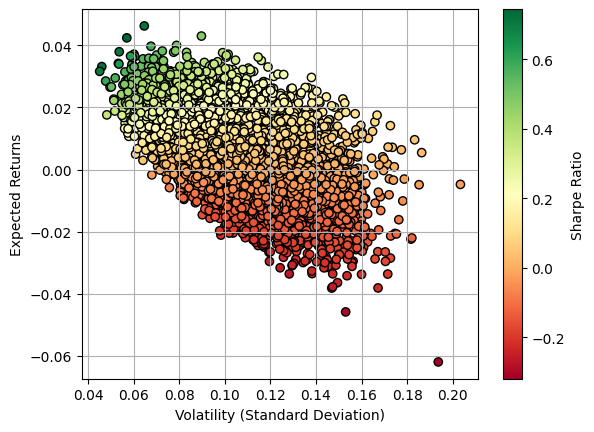

Portfolio with Maximum Sharpe Ratio:
       Returns  Volatility  Sharpe Ratio  ^GSPC Weight  ^FTSE Weight  \
7632  0.042395    0.056966      0.744214      0.197368      0.035371   

      ^N225 Weight  USDEUR=X Weight  GBPEUR=X Weight  JPYEUR=X Weight  \
7632      0.039319         0.255149         0.110434         0.264504   

      CL=F Weight  BZ=F Weight  ^FVX Weight  
7632     0.000501     0.092091     0.005263  

Portfolio with Minimum Volatility:
       Returns  Volatility  Sharpe Ratio  ^GSPC Weight  ^FTSE Weight  \
5684  0.031628    0.045064      0.701843      0.074887      0.092736   

      ^N225 Weight  USDEUR=X Weight  GBPEUR=X Weight  JPYEUR=X Weight  \
5684       0.07576         0.169443         0.250022         0.279303   

      CL=F Weight  BZ=F Weight  ^FVX Weight  
5684     0.006173     0.048234      0.00344  


In [ ]:
# Asset Allocation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


assets= ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]


risk_free_rate = 0.0


pf_data = pd.DataFrame()

# Pre Covid
start= "2017-12-1"
end= "2019-12-01"


for a in assets:
    pf_data[a] =  yf.download(a, start=start,end=end)['Adj Close']

    log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights


# Expected return
m=np.sum(weights * log_returns.mean()) * 250

# Expected Variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

# Expected volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))



pf_returns = []
pf_volatilities = []
sharpe_ratio = []
portfolio_weights = []

for x in range (10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    portfolio_stddev= np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    sharpe_ratio.append(((np.sum(weights * log_returns.mean()) * 250) - risk_free_rate) / portfolio_stddev)
    portfolio_weights.append(weights)

pf_returns, pf_volatilities,sharpe_ratio

pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

# Create a dictionary to store portfolio data
portfolio_data = {
    'Returns': pf_returns,
    'Volatility': pf_volatilities,
    'Sharpe Ratio': sharpe_ratio
}

# Add portfolio weights to the dictionary
for i, symbol in enumerate(assets):
    portfolio_data[symbol + ' Weight'] = [weight[i] for weight in portfolio_weights]

# Create a DataFrame from the portfolio data
df = pd.DataFrame(portfolio_data)

# Define the column order for the DataFrame
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [symbol + ' Weight' for symbol in assets]


# Plot the efficient frontier

plt.scatter(x=df['Volatility'], y=df['Returns'], c=df['Sharpe Ratio'], cmap='RdYlGn', marker='o',edgecolors='black')
plt.colorbar(label='Sharpe Ratio')  # Optional: Add a colorbar
plt.grid(True)
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.show()


# Sharpe ratio
max_sharpe_portfolio = df[df['Sharpe Ratio'] == df['Sharpe Ratio'].max()]

#  minimum volatility
min_volatility_portfolio = df[df['Volatility'] == df['Volatility'].min()]

# portfolios details
print("Portfolio with Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)

print("\nPortfolio with Minimum Volatility:")
print(min_volatility_portfolio)




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


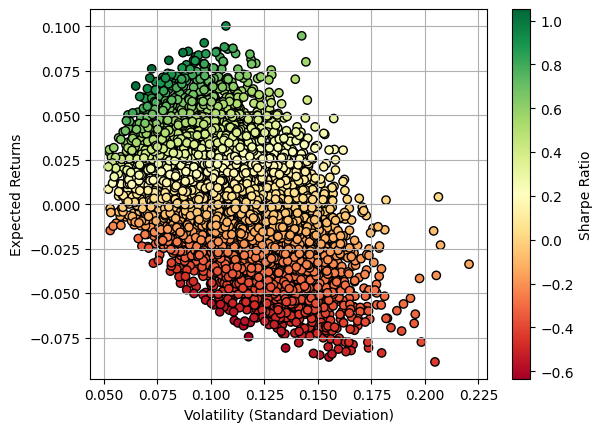

Portfolio with Maximum Sharpe Ratio:
       Returns  Volatility  Sharpe Ratio  ^GSPC Weight  ^FTSE Weight  \
2456  0.076127     0.07235      1.052195      0.238338      0.007105   

      ^N225 Weight  USDEUR=X Weight  GBPEUR=X Weight  JPYEUR=X Weight  \
2456      0.269033         0.065604         0.260048         0.036632   

      CL=F Weight  BZ=F Weight  ^FVX Weight  
2456     0.017031     0.010797     0.095412  

Portfolio with Minimum Volatility:
       Returns  Volatility  Sharpe Ratio  ^GSPC Weight  ^FTSE Weight  \
9556  0.021026    0.052066      0.403832      0.071429      0.084184   

      ^N225 Weight  USDEUR=X Weight  GBPEUR=X Weight  JPYEUR=X Weight  \
9556      0.180207          0.30976         0.257124         0.034441   

      CL=F Weight  BZ=F Weight  ^FVX Weight  
9556     0.003612     0.054962     0.004281  


In [ ]:
# Asset Allocation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


assets= ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]


risk_free_rate = 0.0


pf_data = pd.DataFrame()

# Post Covid
start= "2022-06-1"
end= "2024-06-01"


for a in assets:
    pf_data[a] =  yf.download(a, start=start,end=end)['Adj Close']

    log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights


# Expected return
m=np.sum(weights * log_returns.mean()) * 250

# Expected Variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

# Expected volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))



pf_returns = []
pf_volatilities = []
sharpe_ratio = []
portfolio_weights = []

for x in range (10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    portfolio_stddev= np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    sharpe_ratio.append(((np.sum(weights * log_returns.mean()) * 250) - risk_free_rate) / portfolio_stddev)
    portfolio_weights.append(weights)

pf_returns, pf_volatilities,sharpe_ratio

pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

# Create a dictionary to store portfolio data
portfolio_data = {
    'Returns': pf_returns,
    'Volatility': pf_volatilities,
    'Sharpe Ratio': sharpe_ratio
}

# Add portfolio weights to the dictionary
for i, symbol in enumerate(assets):
    portfolio_data[symbol + ' Weight'] = [weight[i] for weight in portfolio_weights]

# Create a DataFrame from the portfolio data
df = pd.DataFrame(portfolio_data)

# Define the column order for the DataFrame
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [symbol + ' Weight' for symbol in assets]


# Plot the efficient frontier

plt.scatter(x=df['Volatility'], y=df['Returns'], c=df['Sharpe Ratio'], cmap='RdYlGn', marker='o',edgecolors='black')
plt.colorbar(label='Sharpe Ratio')  # Optional: Add a colorbar
plt.grid(True)
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.show()


# Sharpe ratio
max_sharpe_portfolio = df[df['Sharpe Ratio'] == df['Sharpe Ratio'].max()]

#  minimum volatility
min_volatility_portfolio = df[df['Volatility'] == df['Volatility'].min()]

# portfolios details
print("Portfolio with Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)

print("\nPortfolio with Minimum Volatility:")
print(min_volatility_portfolio)




[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


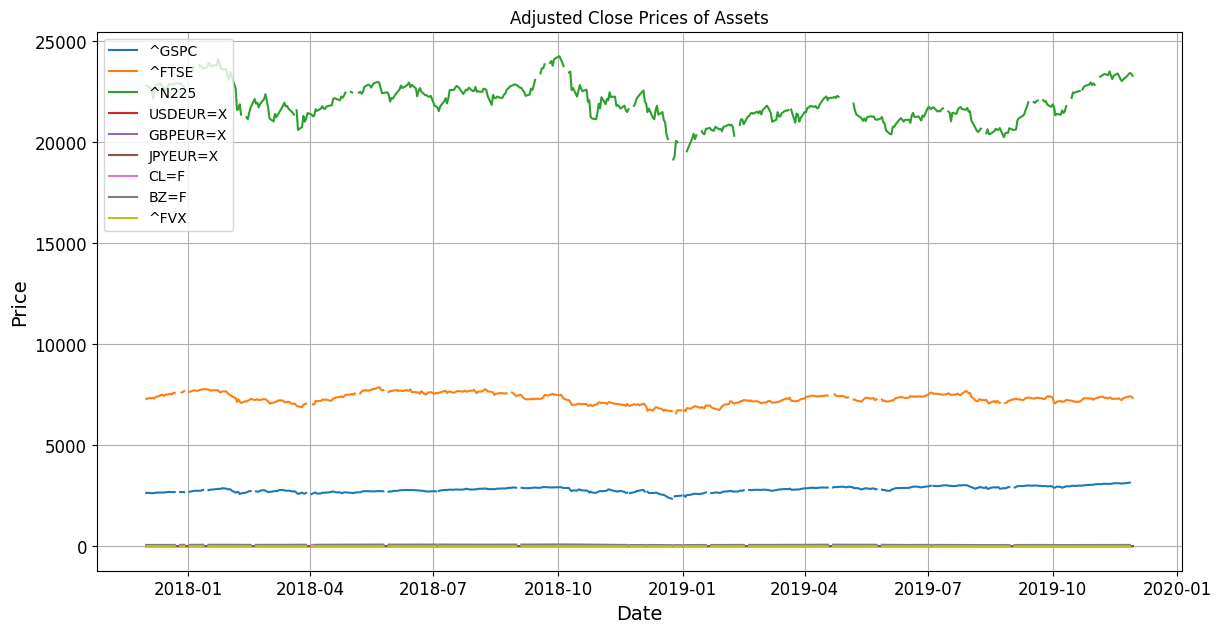

Summary Statistics pre covid:
Ticker        BZ=F        CL=F    GBPEUR=X    JPYEUR=X    USDEUR=X  \
count   520.000000  520.000000  520.000000  520.000000  520.000000   
mean     -0.000032   -0.000108    0.000059    0.000202    0.000149   
std       0.019158    0.020223    0.004206    0.004676    0.003912   
min      -0.076583   -0.082336   -0.018114   -0.014361   -0.012396   
25%      -0.007654   -0.009842   -0.002214   -0.002533   -0.002263   
50%       0.000442    0.000977   -0.000058    0.000000   -0.000006   
75%       0.009635    0.010501    0.002374    0.002609    0.002569   
max       0.136392    0.136944    0.017260    0.033025    0.020638   

Ticker       ^FTSE        ^FVX       ^GSPC       ^N225  
count   520.000000  520.000000  520.000000  520.000000  
mean      0.000012   -0.000514    0.000333    0.000040  
std       0.007496    0.019536    0.009259    0.010290  
min      -0.032842   -0.094335   -0.041843   -0.051405  
25%      -0.004353   -0.010184   -0.003030   -0.004663

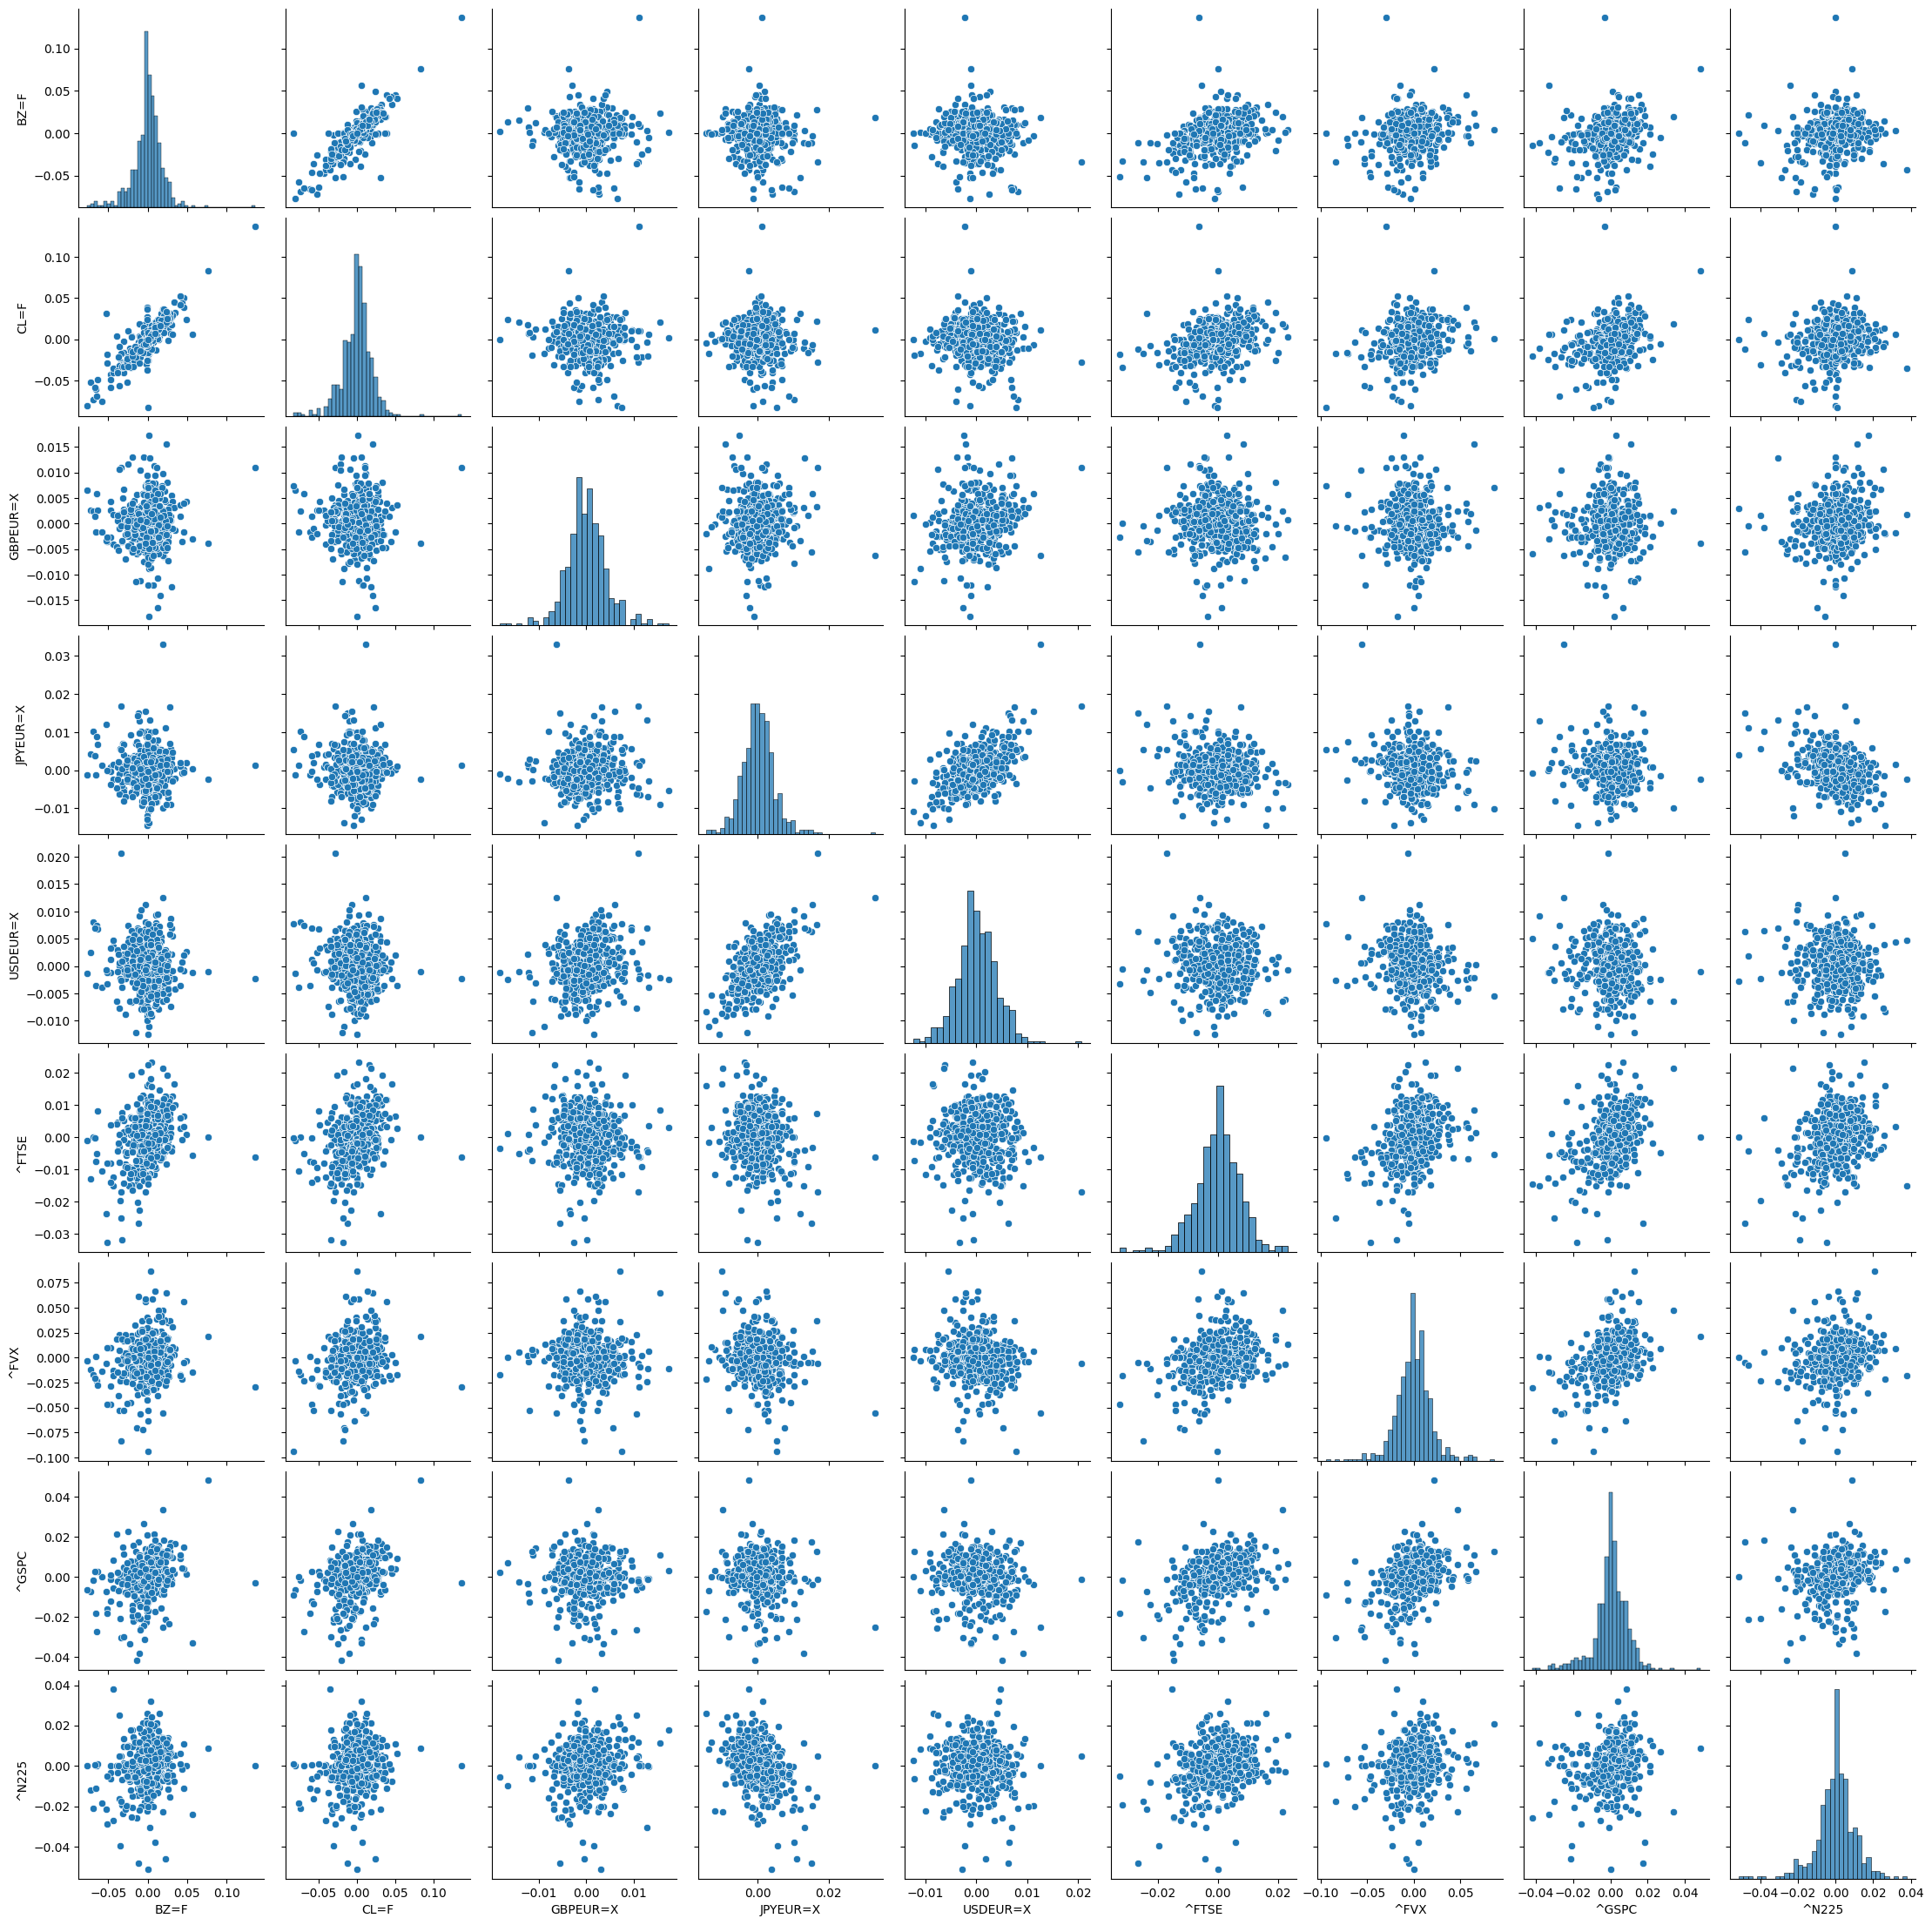

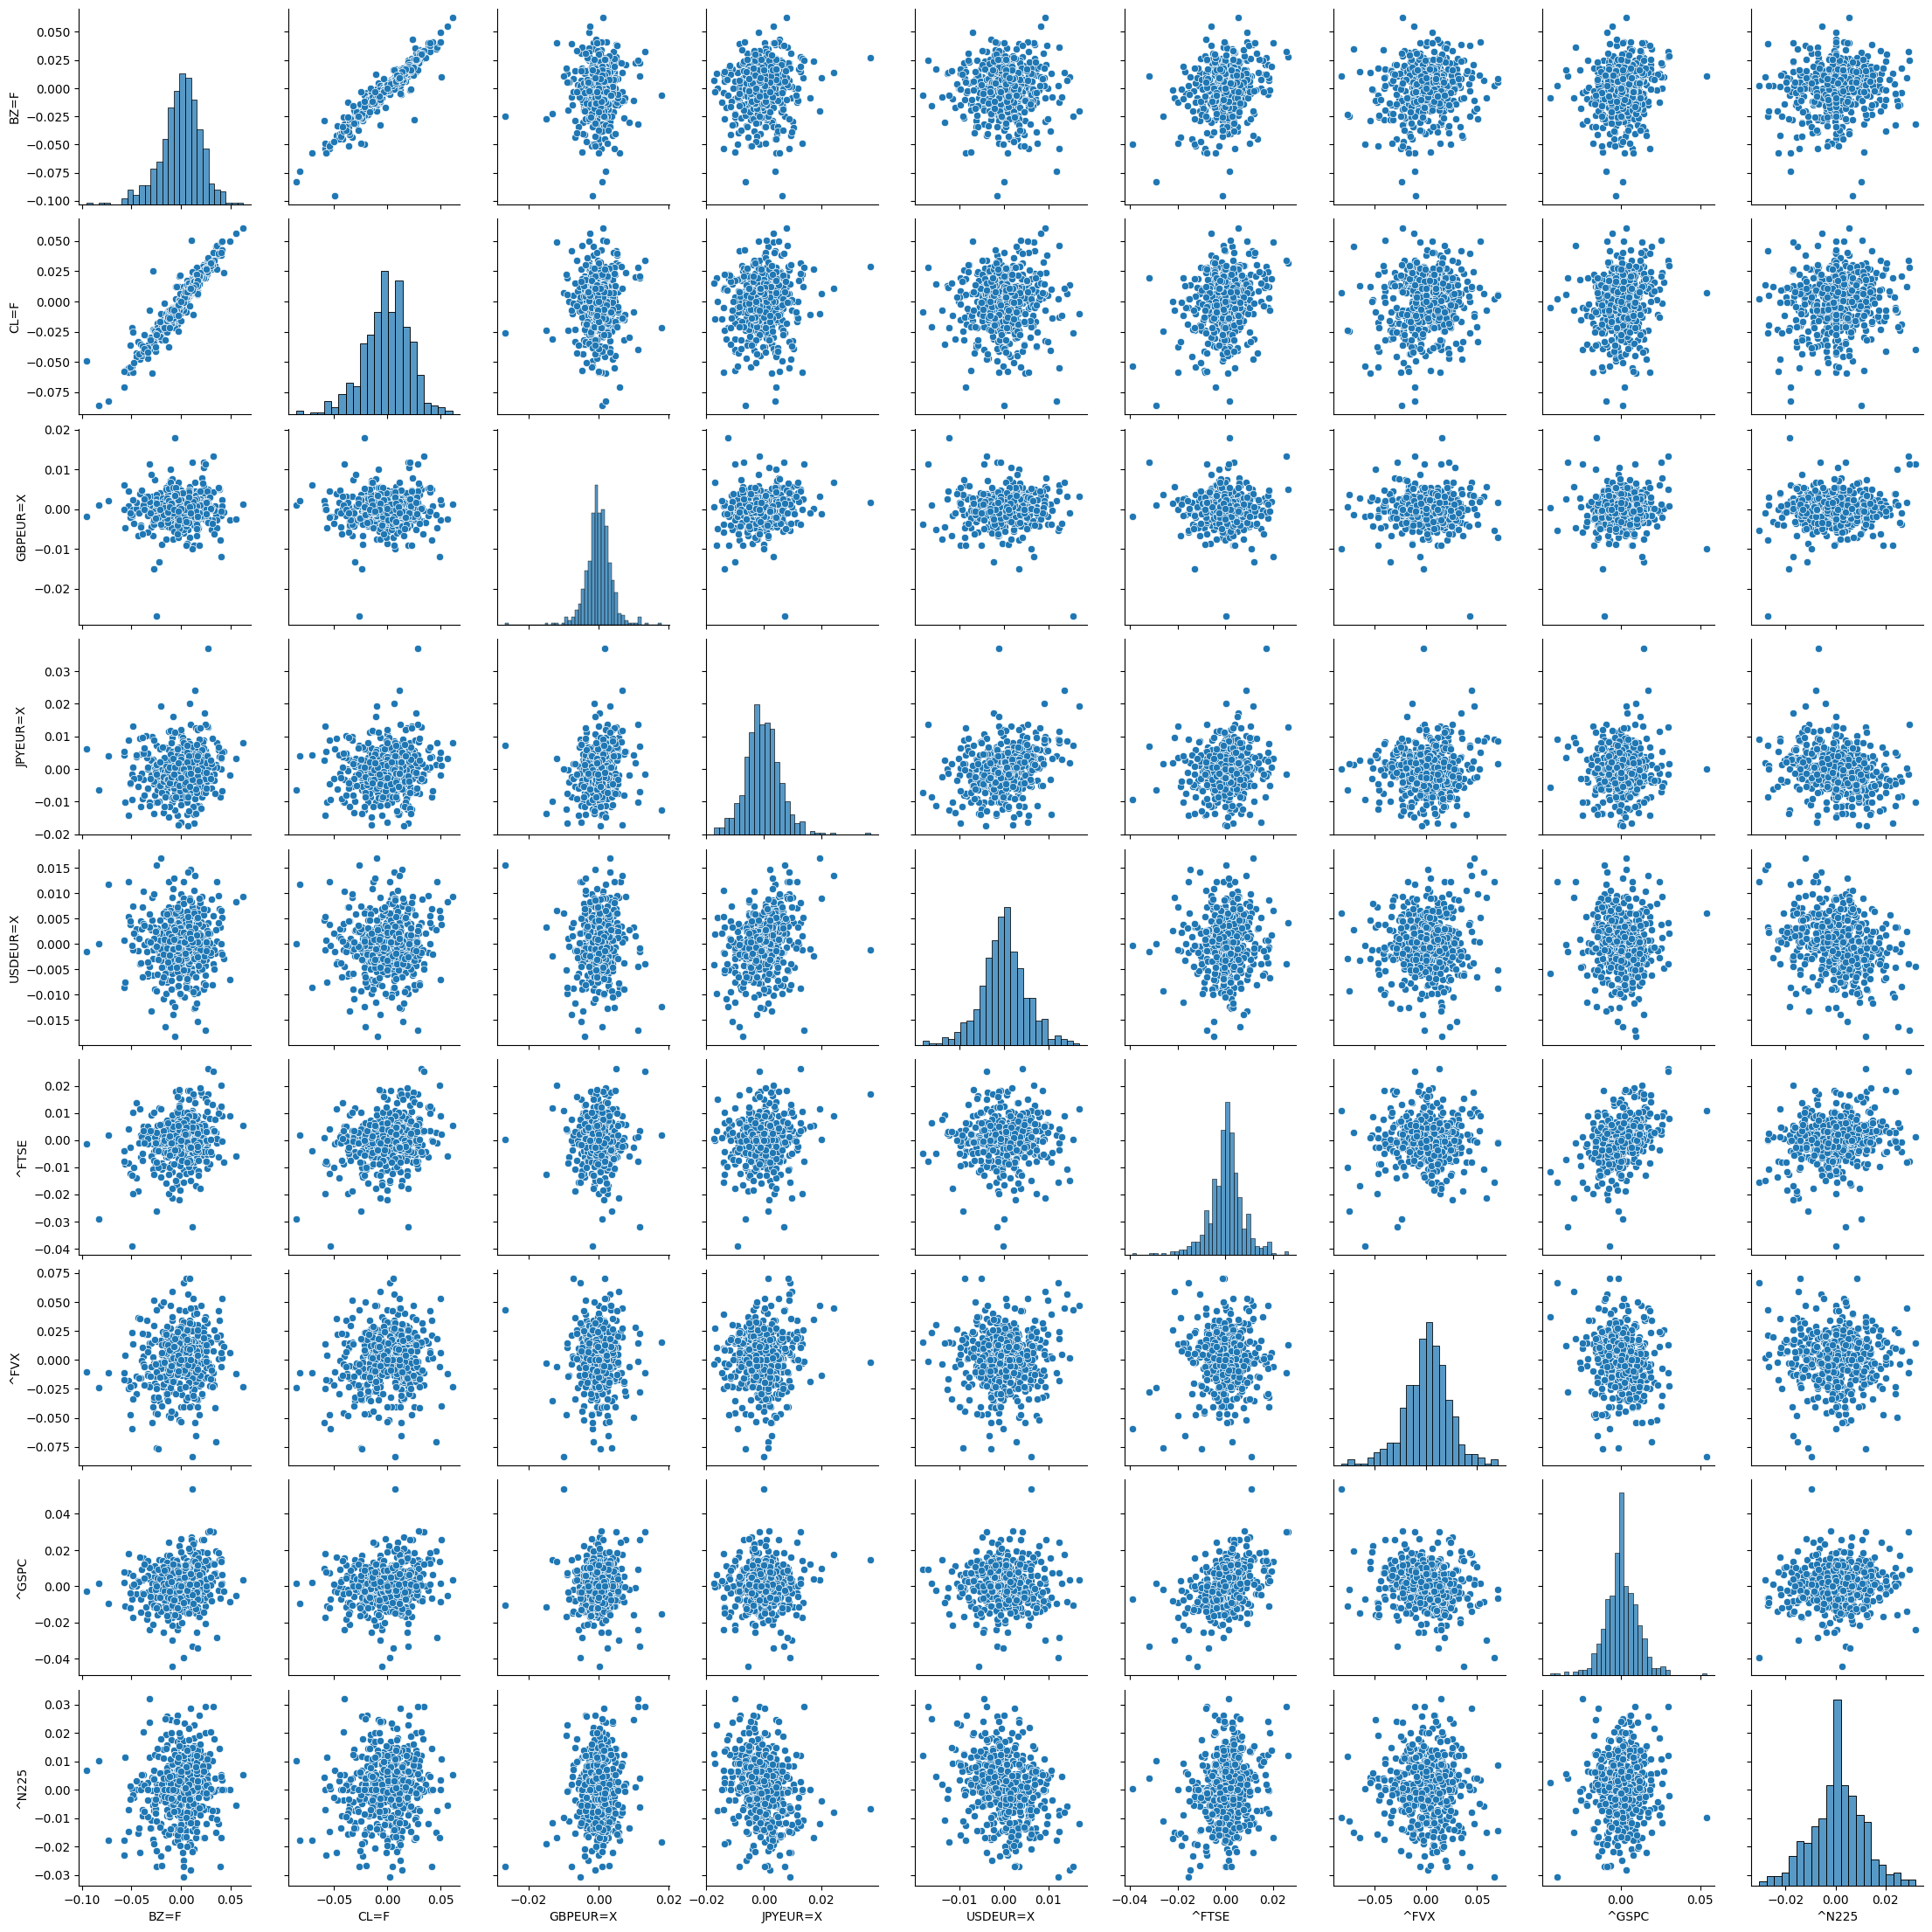

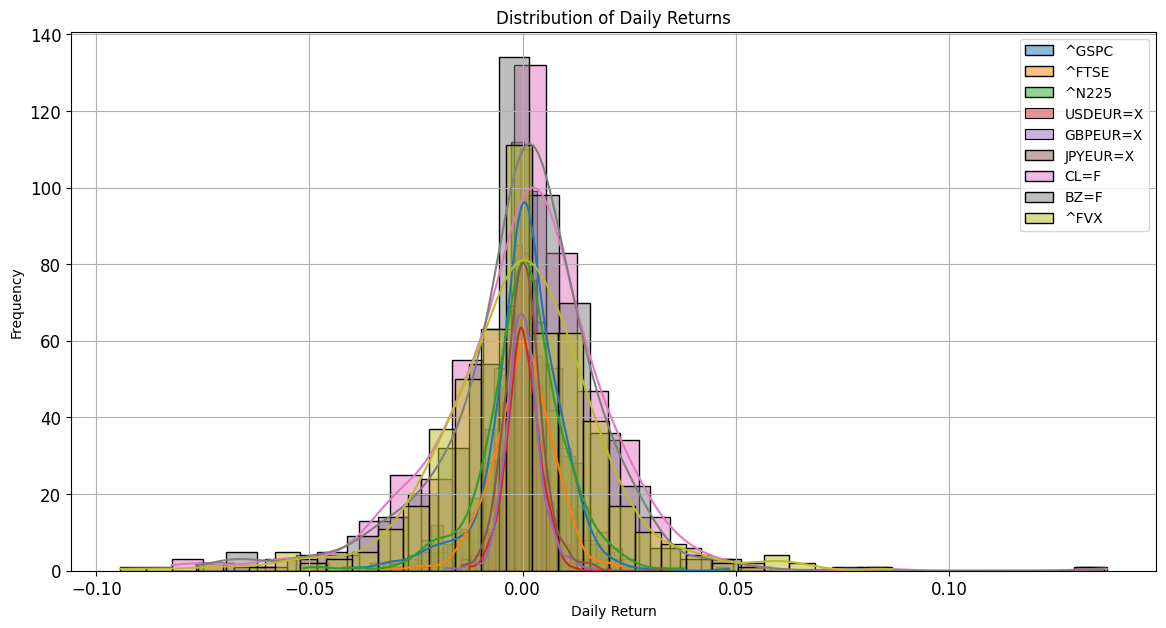

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


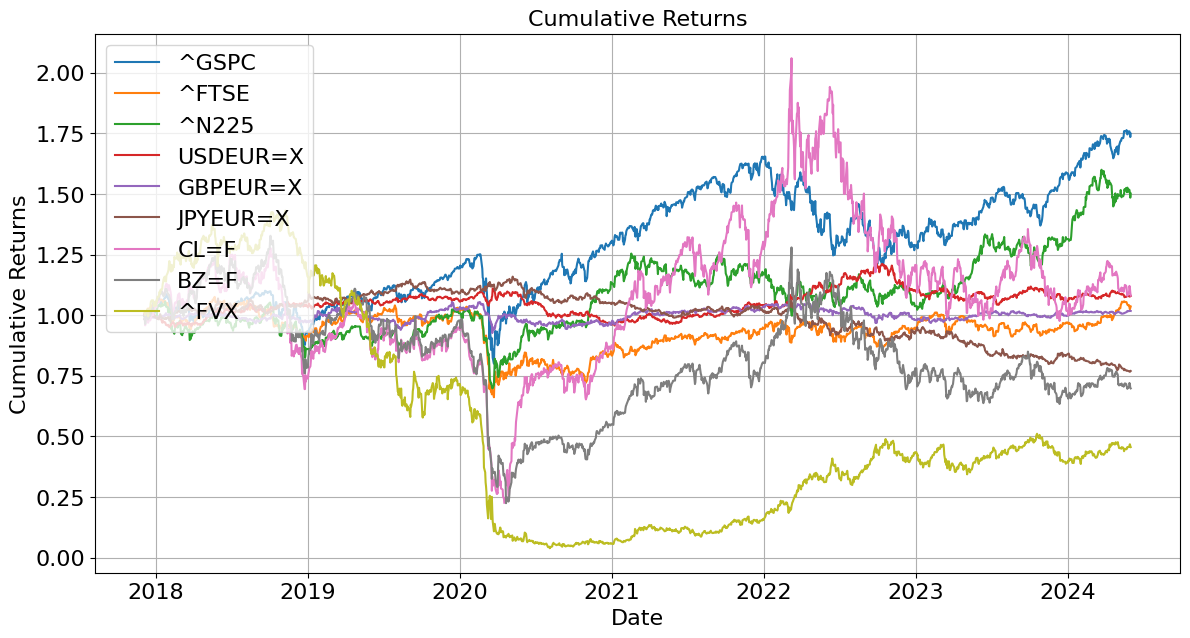

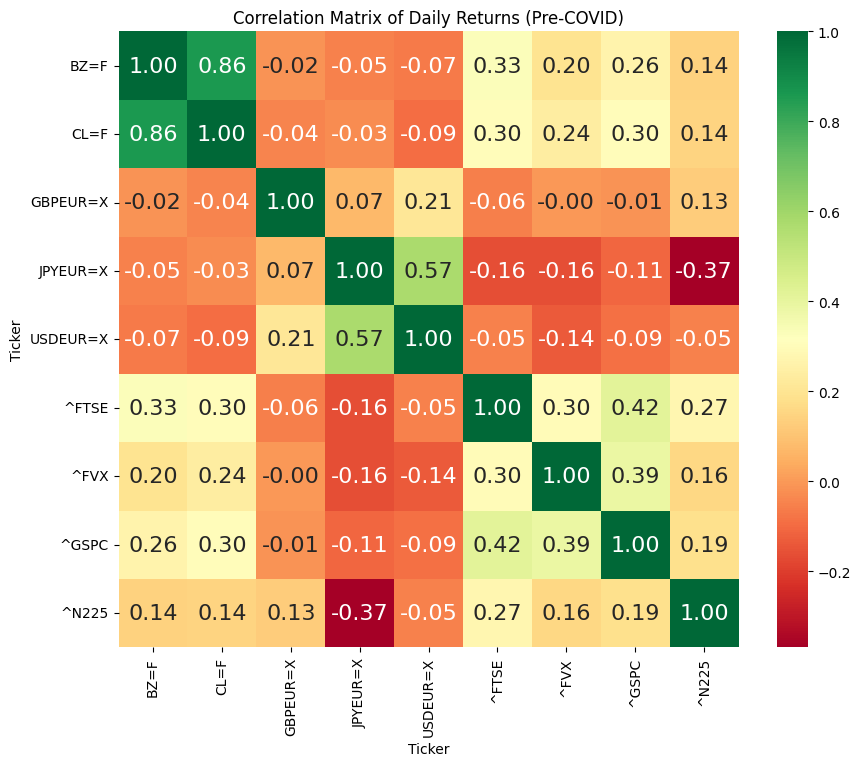

<Figure size 640x480 with 0 Axes>

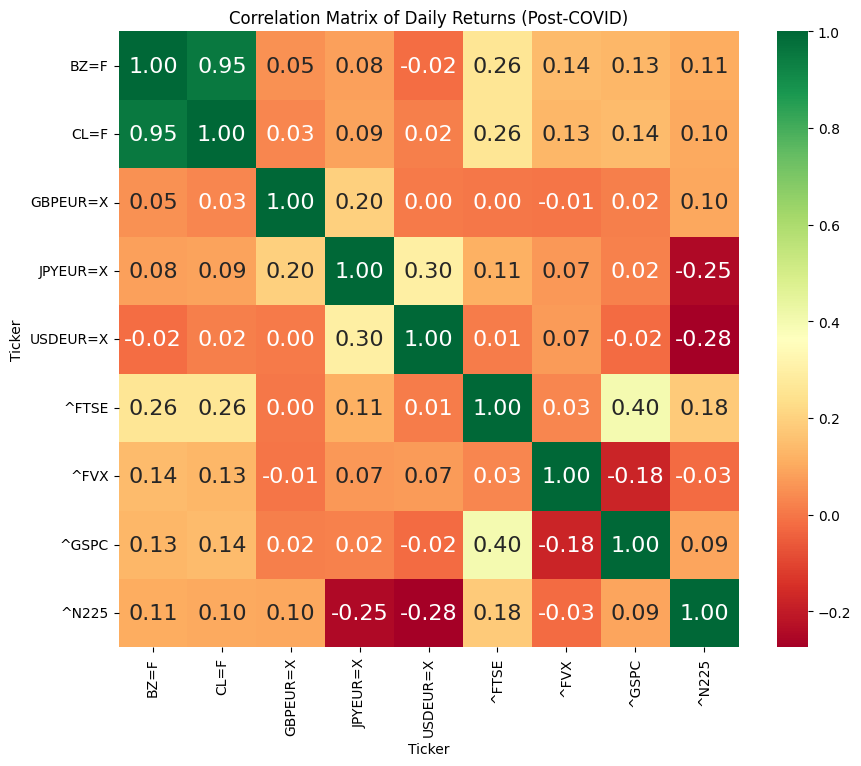

<Figure size 640x480 with 0 Axes>

In [ ]:
# EQuities

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# data=ore_Covid_Data and data_2= post covid data
tickers =  ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]
data_0 = yf.download(tickers, start="2017-12-01", end="2024-06-01")['Adj Close']
data = yf.download(tickers, start="2017-12-01", end="2019-12-01")['Adj Close']
data_2 = yf.download(tickers, start="2022-06-01", end="2024-06-01")['Adj Close']



plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title('Adjusted Close Prices of Assets')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



# Log returns and data cleaning -dropping nas
returns = np.log(1+data.pct_change().dropna())
returns_2 = np.log(1+data_2.pct_change().dropna())

# EDA of prea and posy covid data
print("Summary Statistics pre covid:")
print(returns.describe())
print("Summary Statistics post covid:")
print(returns_2.describe())

sns.pairplot(returns)
plt.show()

sns.pairplot(returns_2)
plt.show()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.histplot(returns[ticker], bins=30, kde=True, label=ticker)

plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


# Cummulative returns (Entire period)
returns_0 = np.log(1+data_0.pct_change().dropna())
cumulative_returns = (1 + returns_0).cumprod()
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative Returns', fontsize=16)
plt.title('Cumulative Returns', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left',fontsize=16)
plt.grid(True)
plt.show()

# Correlation analysis
correlation_matrix = returns.corr()
correlation_matrix_2 = returns_2.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, cmap='RdYlGn', annot=True, fmt=".2f", cbar=True,annot_kws={"size": 16})

plt.title('Correlation Matrix of Daily Returns (Pre-COVID)')
plt.show()
# prevents overlaps

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix_2, cmap='RdYlGn', annot=True, fmt=".2f", cbar=True,annot_kws={"size": 16})

plt.title('Correlation Matrix of Daily Returns (Post-COVID)')
plt.show()
# prevents overlaps

plt.tight_layout()
plt.show()
